In [9]:
#importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [8]:
tf.__version__

'2.16.1'

In [10]:
#loading and preprocessing the dataset

In [13]:
(X_train,y_train),(_,_) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [14]:
X_train.shape

(60000, 28, 28)

In [17]:
#this means that no of images in the dataset is 60000 with dimensions of 28 by 28 pixels

In [18]:
y_train.shape

(60000,)

In [21]:
#X_train stores all the pixels of the images
#y_train stores the classes

837
5


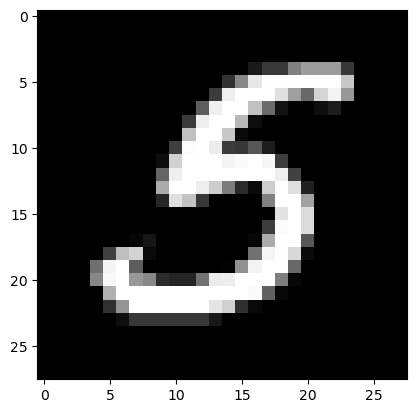

In [53]:
i = np.random.randint(0,60000)
print(i)
print(y_train[i])
plt.imshow(X_train[i],cmap='gray')

In [54]:
#Preprocess the dataset to make it compatible with tensorflow

In [55]:
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')

In [56]:
X_train.shape

(60000, 28, 28, 1)

In [57]:
#here, 1 denotes no of channels. For greyscale images as we are dealing here, the number of channels is 1
# if the no of channels is 3(RGB), we deal with coloured images

In [60]:
X_train[0].min(),X_train[0].max()

(0.0, 255.0)

In [61]:
#0 represents black and 255.0 represents white

In [62]:
#To train a neural network, we need to normalize this data as the range is too big and the neural network will take a longer time to process

In [63]:
#Normalize the data

In [64]:
X_train = (X_train-127.5)/127.5

In [65]:
X_train[0].min(),X_train[0].max()

(-1.0, 1.0)

In [66]:
# while working with DCGANs, it is recommended to keep the range as (-1,1)

In [86]:
buffer_size = 60000
batch_size = 256

In [87]:
buffer_size/batch_size

234.375

In [154]:
#Here, to train the neural network we will be using the mini-batch gradient descent algorithm. We will be dividing the data of 
#60000 images into 256 batches with each batch consisting of 234 images


In [155]:
type(X_train)

tensorflow.python.data.ops.batch_op._BatchDataset

In [156]:
#In order to train the neural network, we need to convert X_train from numpy entity to a tensorflow entitiy

In [156]:
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

In [159]:
type(X_train)

tensorflow.python.data.ops.batch_op._BatchDataset

In [99]:
X_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

In [176]:
#100 --> 12544
#building the generator
def build_generator():
    # 7*7*256
    network = tf.keras.Sequential() #syntax to create a neural network with sequential layers

    network.add(layers.Dense(units = 7*7*256 , use_bias = False , input_shape=(100,))) #creating dense neural network
    network.add(layers.BatchNormalization()) #normalization applied since we had normalized the data set in (-1,1)
    network.add(layers.LeakyReLU()) #applying the leaky relu activation funtion 

    network.add(layers.Reshape((7,7,256))) #conversion from vector to matrix form 

    #7*7*128 #creating the first convolutional layer
    network.add(layers.Conv2DTranspose(filters=128 , kernel_size=(5,5)  , padding = 'same' , use_bias = False)) 
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())

    #14*14*64 #creating the second convolutional layer
    network.add(layers.Conv2DTranspose(filters=64 , kernel_size=(5,5) , strides=(2,2) , padding = 'same' , use_bias = False))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())

    #28*28*1 #final convolutional layer obtaining image of size 28x28 pixels
    network.add(layers.Conv2DTranspose(filters = 1, kernel_size = (5,5) , strides=(2,2) , padding = 'same' , use_bias = False))
    network.add(layers.Activation('tanh'))

    network.summary()

    return network
    

    

    

In [177]:
generator = build_generator()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 12544)          │     1,254,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_29 (LeakyReLU)      │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_10 (Reshape)            │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_27             │ (None, 7, 7, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_30 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_28             │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_31 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_29             │ (None, 28, 28, 1)      │         1,600 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

In [178]:
noise = tf.random.normal([1,100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 0.09322155,  0.5071168 ,  0.60218805, -0.409884  , -2.8974867 ,
         0.4137509 ,  0.3770722 ,  0.91103524, -0.24240553,  1.9157096 ,
         1.1944343 , -0.9147531 ,  0.44699585,  0.17209311,  1.3680595 ,
        -0.7120839 ,  0.16136163, -0.2763403 , -1.9461061 ,  0.3090579 ,
        -0.28083676, -3.1671736 ,  1.0267819 , -0.74143374, -1.0915614 ,
         0.66606677,  0.43757218,  0.85316104,  0.63291085, -0.09095856,
        -0.5408472 ,  1.0135976 ,  0.3107905 ,  0.52032846,  0.75256926,
         0.6646361 ,  0.03466412, -0.03747455,  0.5975869 ,  0.07689416,
        -2.1723123 ,  1.7251686 ,  0.78343624, -0.5998474 , -0.00633776,
        -0.8094539 ,  1.8914466 ,  1.6378766 , -0.6122156 , -2.0512512 ,
        -1.2949219 ,  1.0490712 ,  0.16574374, -1.5178224 , -0.27380702,
        -0.87385327, -0.5219343 ,  0.69100004,  0.8504847 , -0.02995384,
        -0.3523043 ,  0.7611484 , -0.07171971,  0.09056403, -1.9587702 ,
 

In [179]:
generated_image = generator(noise, training=False)

In [180]:
generated_image

<tf.Tensor: shape=(1, 28, 28, 1), dtype=float32, numpy=
array([[[[ 5.48200030e-03],
         [ 2.43377709e-03],
         [-1.37453410e-03],
         [ 7.65724853e-03],
         [-3.95338517e-04],
         [ 2.29290989e-03],
         [ 6.61143614e-03],
         [-6.22722879e-03],
         [ 4.58642840e-03],
         [ 1.06408272e-03],
         [ 5.69164008e-03],
         [-7.33878370e-03],
         [ 3.51616298e-03],
         [-5.89089293e-04],
         [ 1.81051216e-03],
         [ 1.45213343e-02],
         [ 1.24509297e-02],
         [ 1.50590381e-02],
         [-2.11249269e-03],
         [-2.14305404e-03],
         [ 1.49044469e-02],
         [-7.96149299e-03],
         [ 3.34187690e-03],
         [-8.94990750e-03],
         [ 8.46952433e-04],
         [ 7.24030193e-04],
         [ 3.42170149e-03],
         [-3.37200449e-03]],

        [[-7.75887398e-04],
         [-4.05163458e-03],
         [ 4.28430689e-03],
         [ 3.52052134e-03],
         [ 1.70694909e-03],
         [ 1.48480

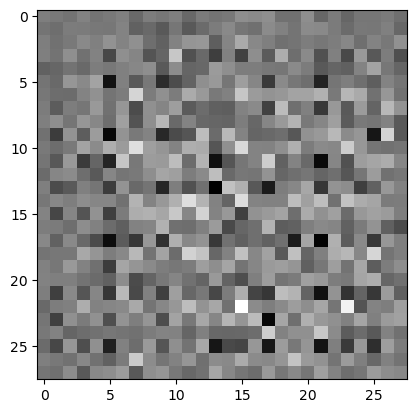

In [184]:
plt.imshow(generated_image[0,:,:,0],cmap='gray')

In [189]:
discriminator = build_discriminator()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_32 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_33 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

In [188]:
def build_discriminator(): # does the inverse of the generator process
    network = tf.keras.Sequential()

    #14*14*64
    network.add(layers.Conv2D(filters = 64 , kernel_size = (5,5) , strides = (2,2) , padding = 'same' , input_shape= [28,28,1]))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3)) #prevents the NN from overfitting. This happens when the neural network adapts too much to the input data and its not able to produce correct results
    #Overfitting is prevented by deleting 30% (0.3) of the total neurons

    #7*7*128
    network.add(layers.Conv2D(filters = 128 , kernel_size = (5,5) , strides = (2,2) , padding = 'same'))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3))

    network.add(layers.Flatten()) #conversion to 1D array

    network.add(layers.Dense(1)) #creating the output layer consisting of only one neuron as it only has to return the probability of the image being real or fake

    network.summary()

    return network
    
    

    

In [193]:
discriminator.input_shape

(None, 28, 28, 1)

In [194]:
discriminator(generated_image , training = False)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00038137]], dtype=float32)>

In [199]:
tf.sigmoid(0.00038137) #logits

<tf.Tensor: shape=(), dtype=float32, numpy=0.50009537>

In [200]:
#Returned probability = 0.50009537 or 50%
#The discriminator has not yet been trained so it doesn't know how to distinguish between real and fake images 
#so it will always return probability around 50%

In [201]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [205]:
def discriminator_loss(expected_output,fake_ouptut): #calculation of duscriminator loss
    real_loss = cross_entropy(tf.ones_like(expected_output),expected_output) #real images are compared with a vector of 1s
    fake_loss = cross_entropy(tf.zeros_like(fake_ouptut),fake_ouptut) #fake images from the generator are compared wuth a vector of 0s
    total_loss = real_loss+fake_loss #total loss

    return total_loss

In [206]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output),fake_output) #This is the link between the generator and the discriminator. 
#The fake image is compared with a vector of 1s as the goal of the generator is to cheat the discriminator to produce almost real images

In [210]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) #applying Adam's Algorithm to readjust the weights using gradient descent
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

#The Adam's algorithm is an improvement over the regular gradient descent algorithm

In [211]:
#Training

In [213]:
epochs =100
number_of_images=16
noise_dimension=100

In [245]:
@tf.function
def train(images):
    noise =tf.random.normal([batch_size,noise_dimension]) #the noise given to be sent to the generator is a matrix of 256 rows and 100 columns
    with tf.GradientTape(persistent=True) as gen_tape, tf.GradientTape(persistent=True) as disc_tape: #Tensorflow class to calculate gradients
        generated_images = generator(noise,training=True) #generate images by feeding noise to the generator

        #Get the expected and fake outputs from the discriminator
        expected_output = discriminator(images , training = True)   #we use the set of real world images for expected output
        fake_output = discriminator(generated_images , training = True) #we use the images generated by the generator for the fake output
        
        #calculating errors
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(expected_output , fake_output)

    #finding gradients (direction in which we need to change the weights ; like 0.3 to be made 0.1 or 0.5?
    generator_gradients = gen_tape.gradient(gen_loss , generator.trainable_variables)
    discriminator_gradients = gen_tape.gradient(disc_loss , discriminator.trainable_variables)
    
    #Applying the gradients and updating the weights using the optimizer
    generator_optimizer.apply_gradients(zip(generator_gradients , generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients , discriminator.trainable_variables))


In [249]:
test_images = tf.random.normal([number_of_images,noise_dimension])

def train_gan(dataset,epochs,test_images):
    for epoch in range(epochs):
        #print(epoch)

        for image_batch in dataset:
            #print(image_batch.shape)
            train(image_batch)  #training images in batches (applying mini-batch gradient descent algorithm

    #Training of GAN done
        print('Epoch: ',epoch+1)
        generated_images = generator(test_images,training = False)
        fig = plt.figure(figsize=(10,10))
        for i in range(len(generated_images)):
            plt.subplot(4,4,i+1)
            plt.imshow(generated_images[i,:,:,0],cmap='gray')
            plt.axis('off')
        plt.show()

Epoch:  1


2024-05-18 04:56:38.669225: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


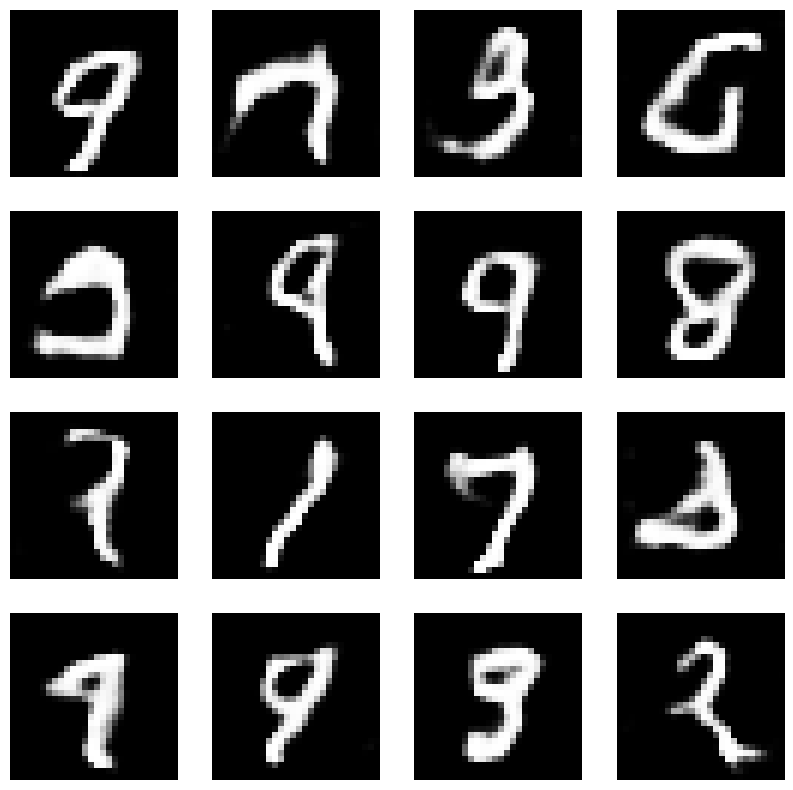

Epoch:  2


2024-05-18 04:58:52.739333: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


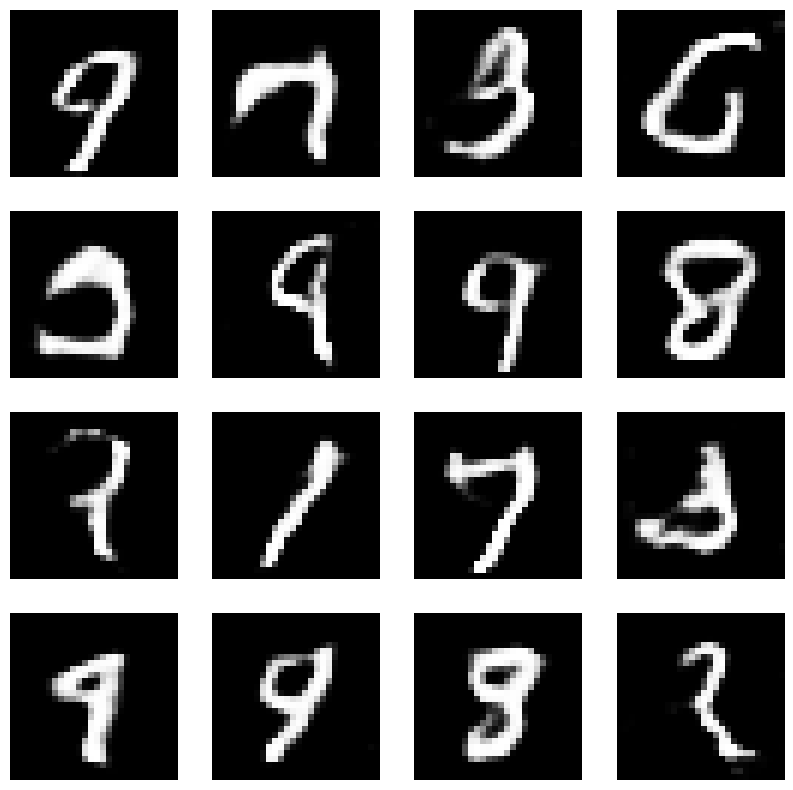

Epoch:  3


2024-05-18 05:01:06.943833: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


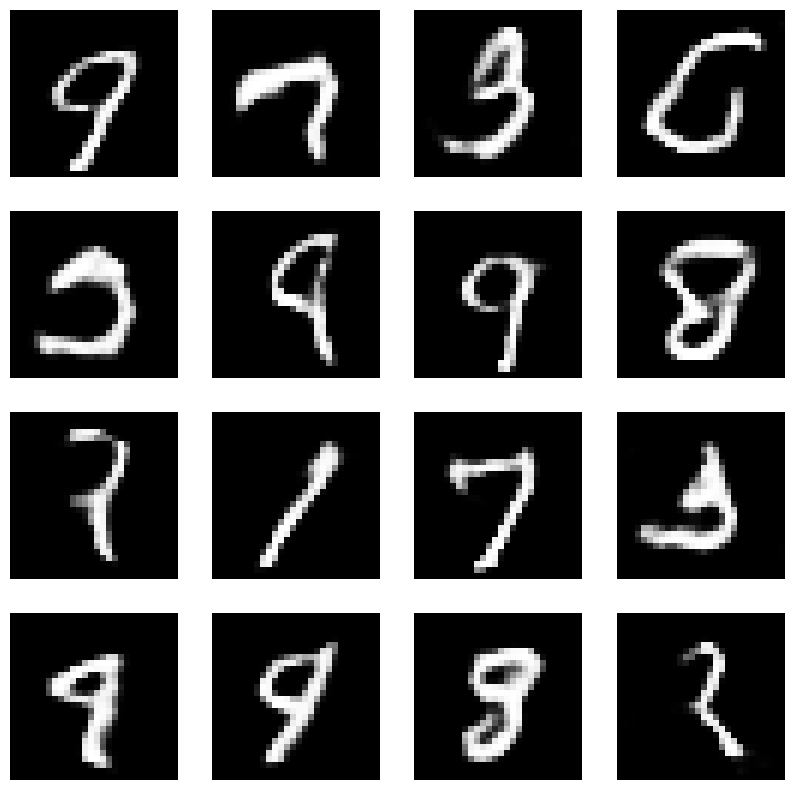

Epoch:  4


2024-05-18 05:03:20.704512: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


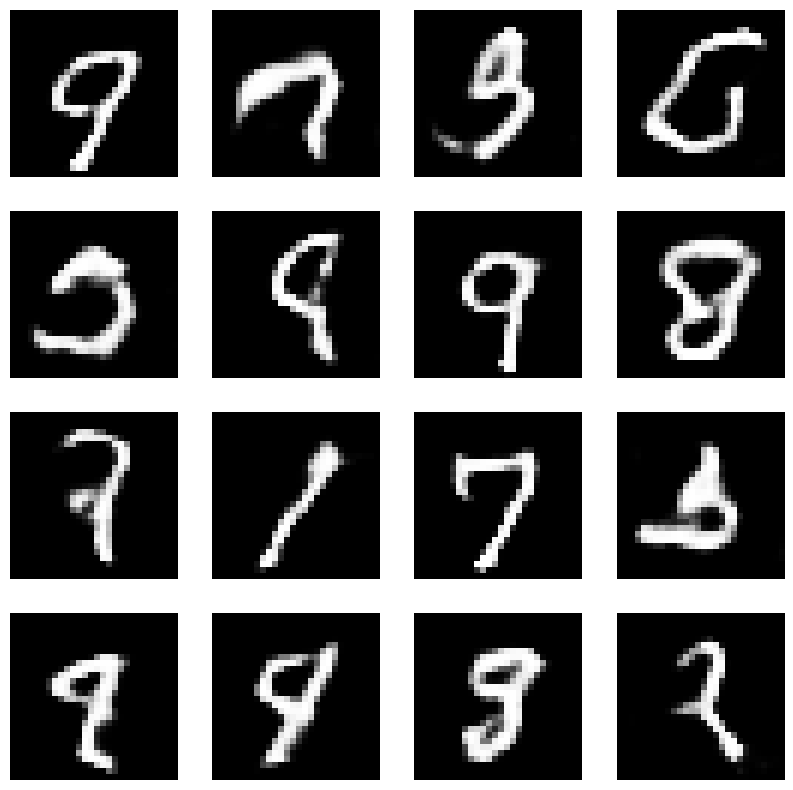

Epoch:  5


2024-05-18 05:05:34.503206: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


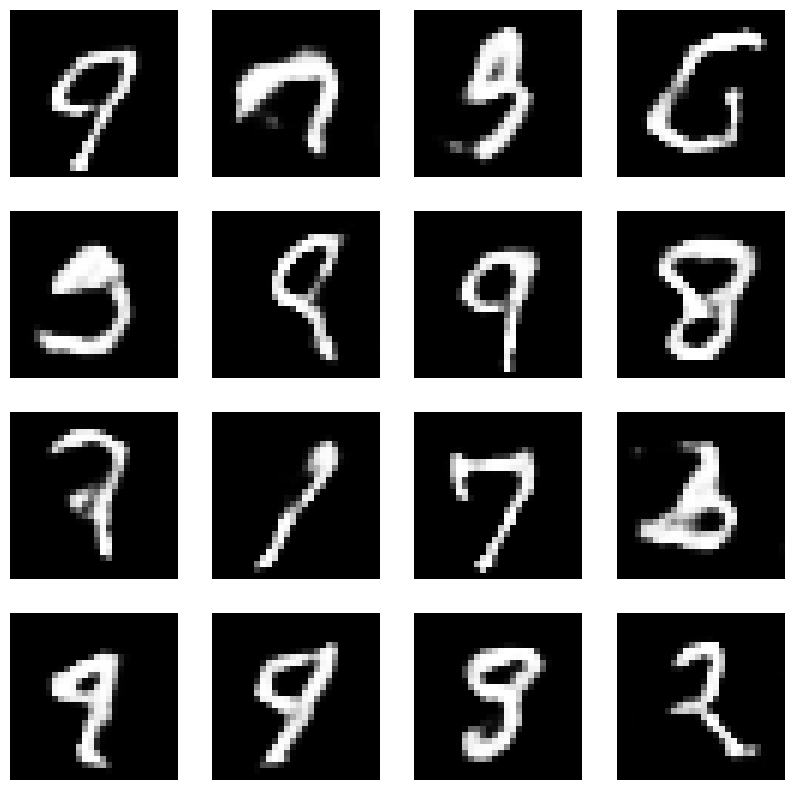

Epoch:  6


2024-05-18 05:07:48.157853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


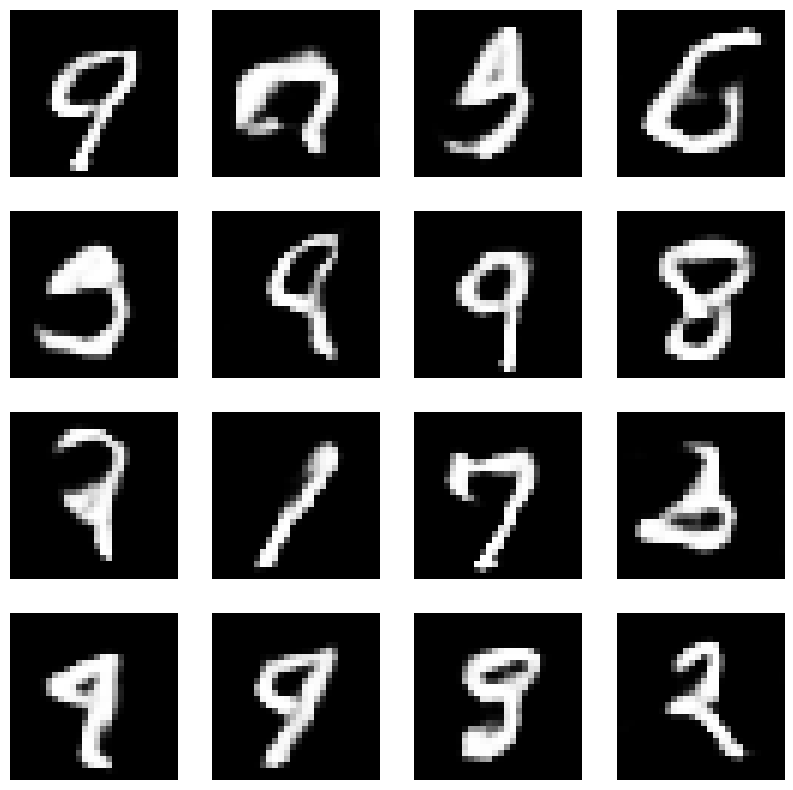

Epoch:  7


2024-05-18 05:10:01.503086: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


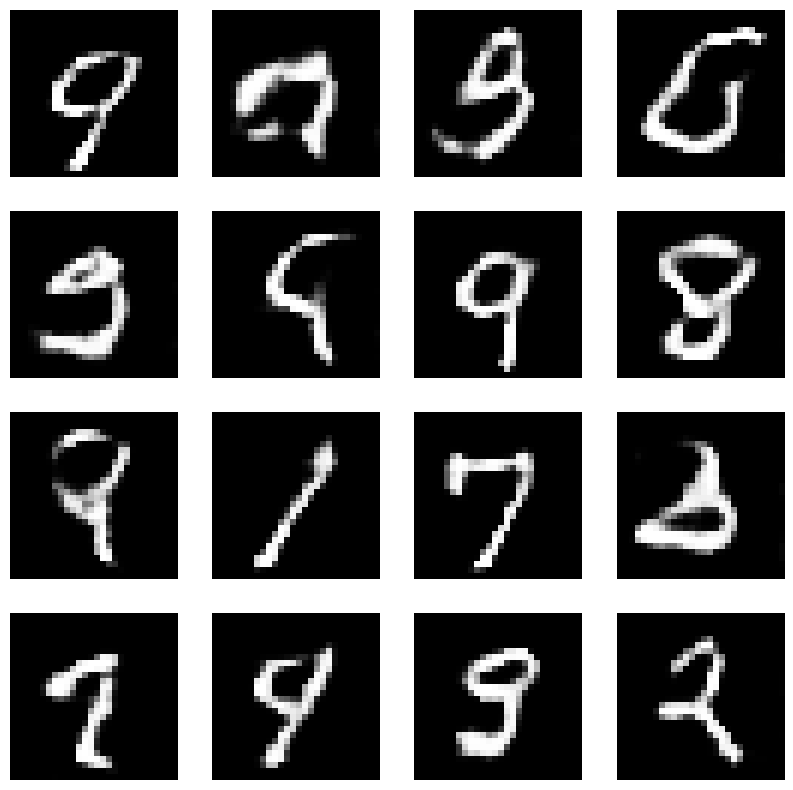

Epoch:  8


2024-05-18 05:12:15.126690: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


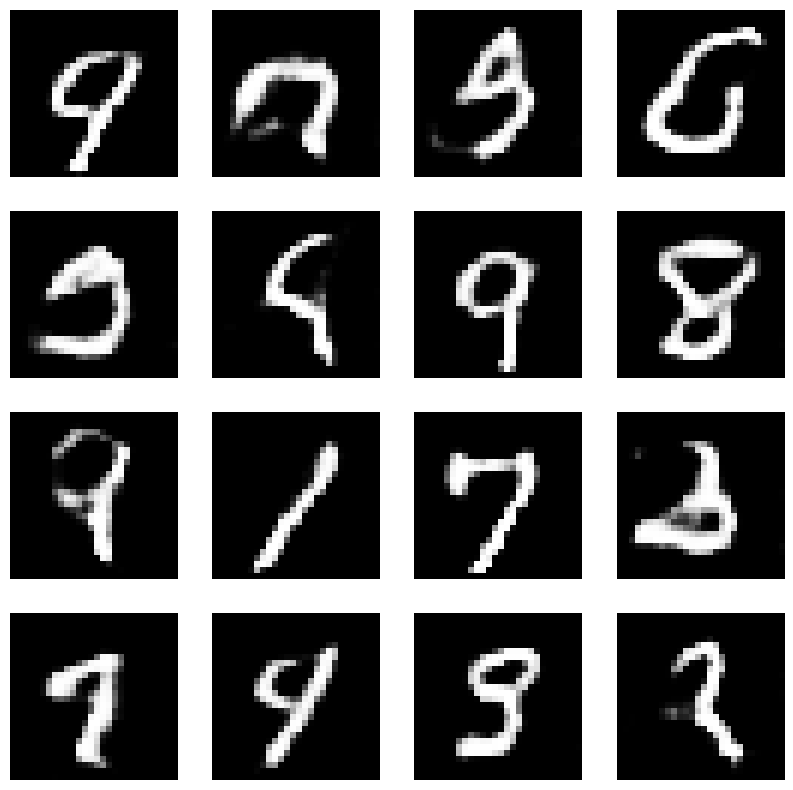

Epoch:  9


2024-05-18 05:14:28.847448: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


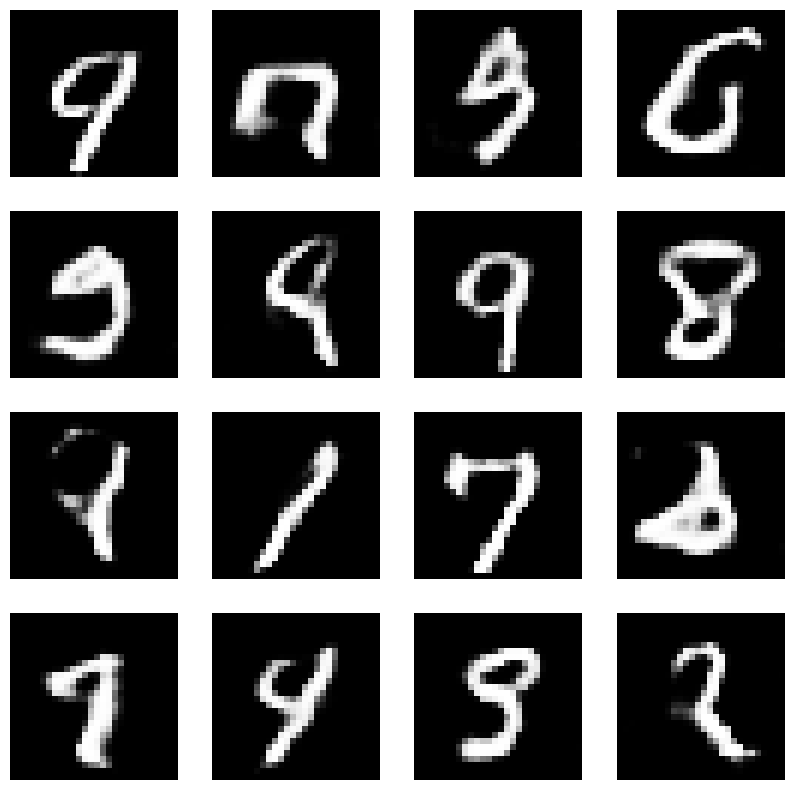

2024-05-18 05:16:42.233658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch:  10


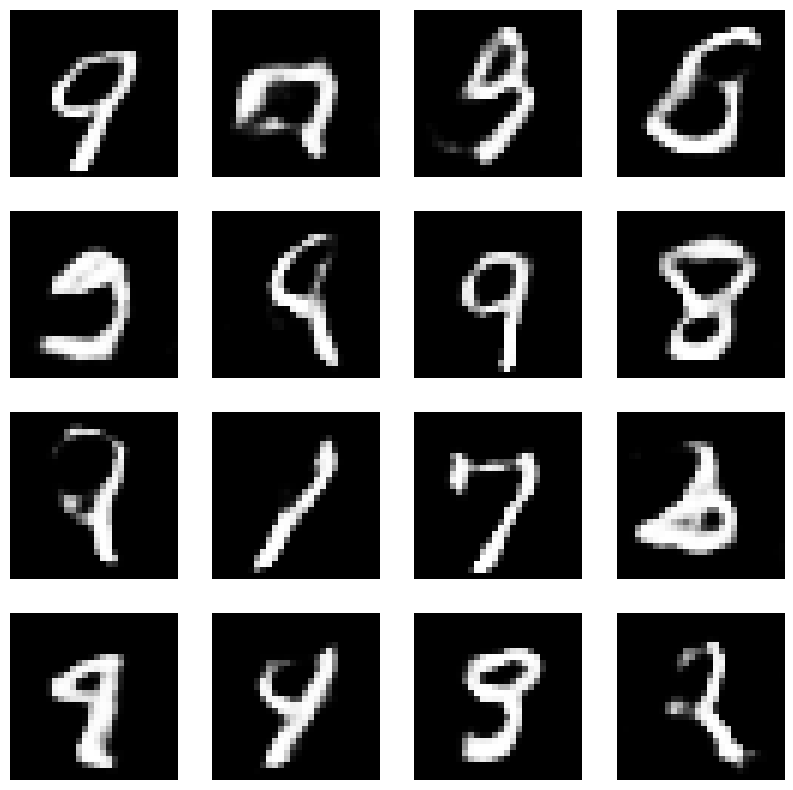

Epoch:  11


2024-05-18 05:18:56.810655: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


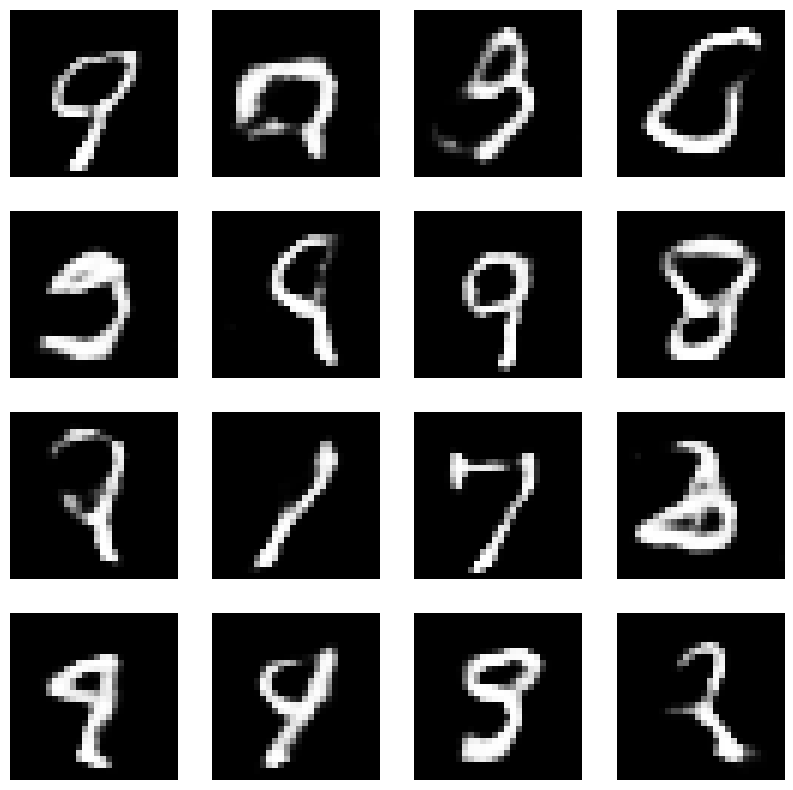

Epoch:  12


2024-05-18 05:21:12.334753: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


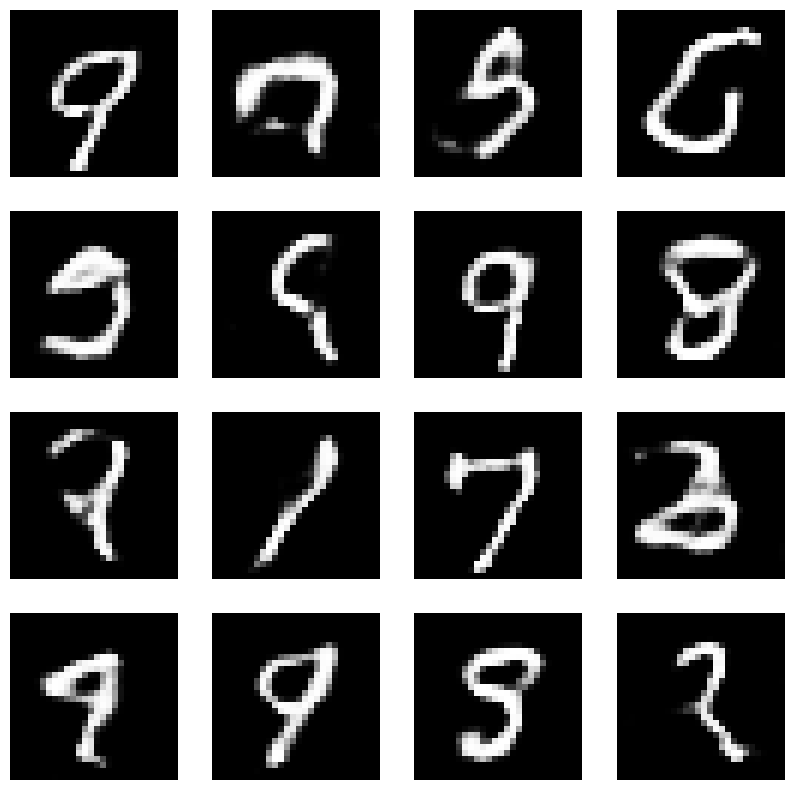

Epoch:  13


2024-05-18 05:23:31.269600: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


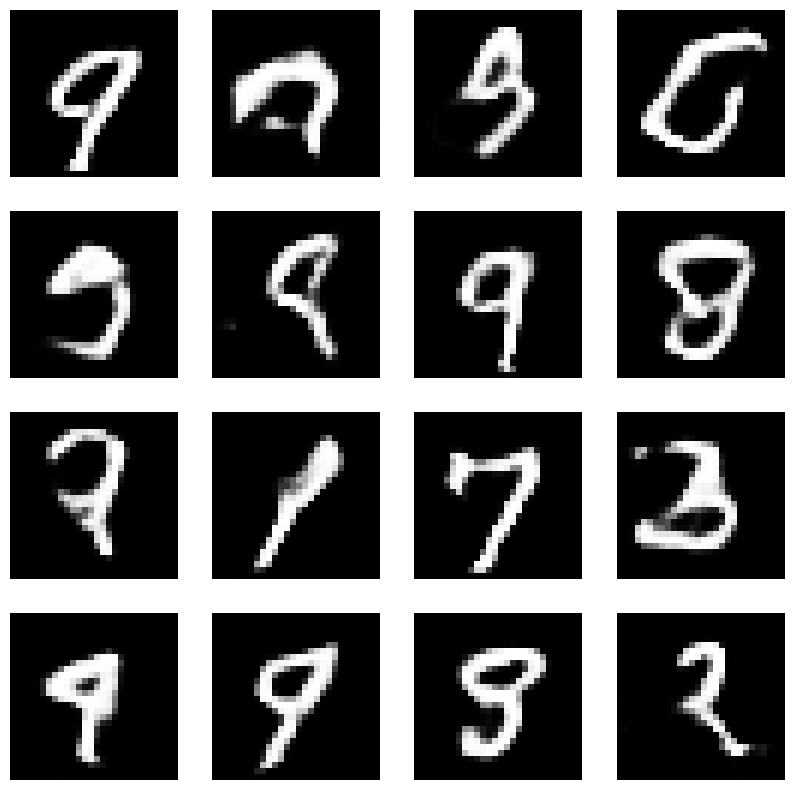

Epoch:  14


2024-05-18 05:25:54.585042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


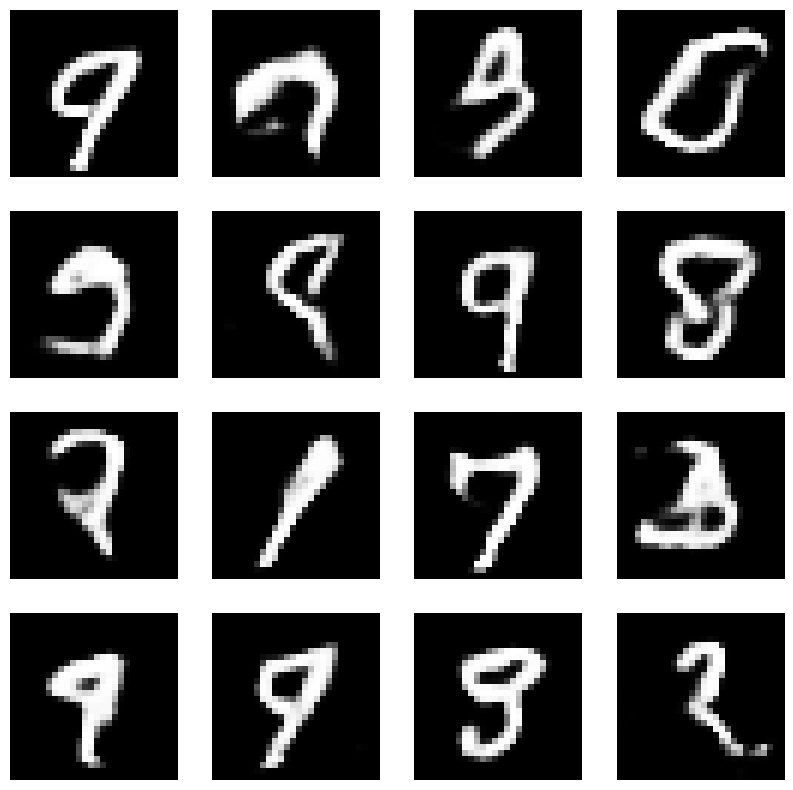

Epoch:  15


2024-05-18 05:28:22.603966: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


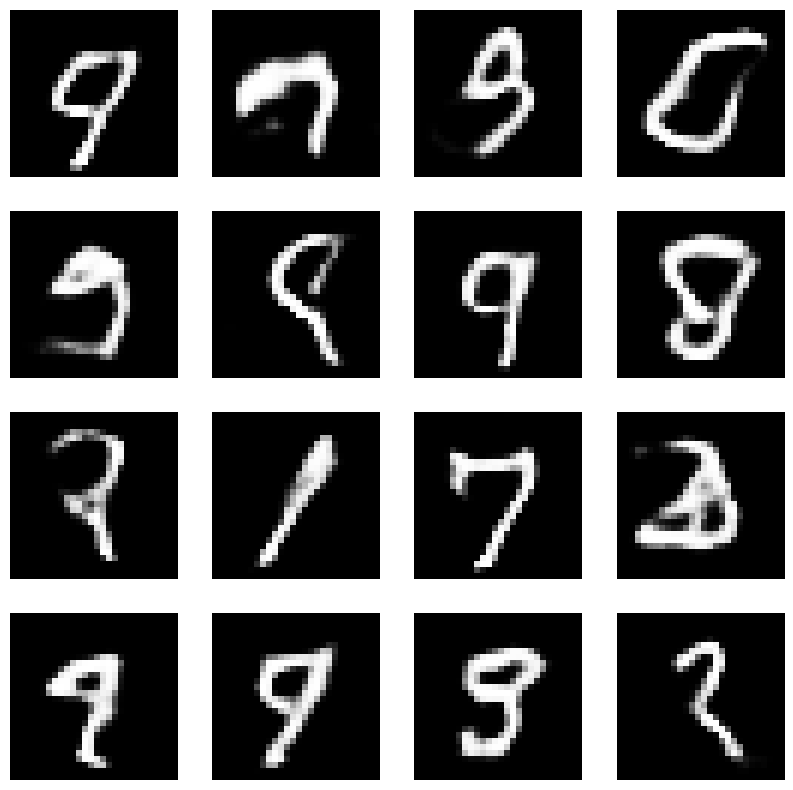

Epoch:  16


2024-05-18 05:30:53.689362: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


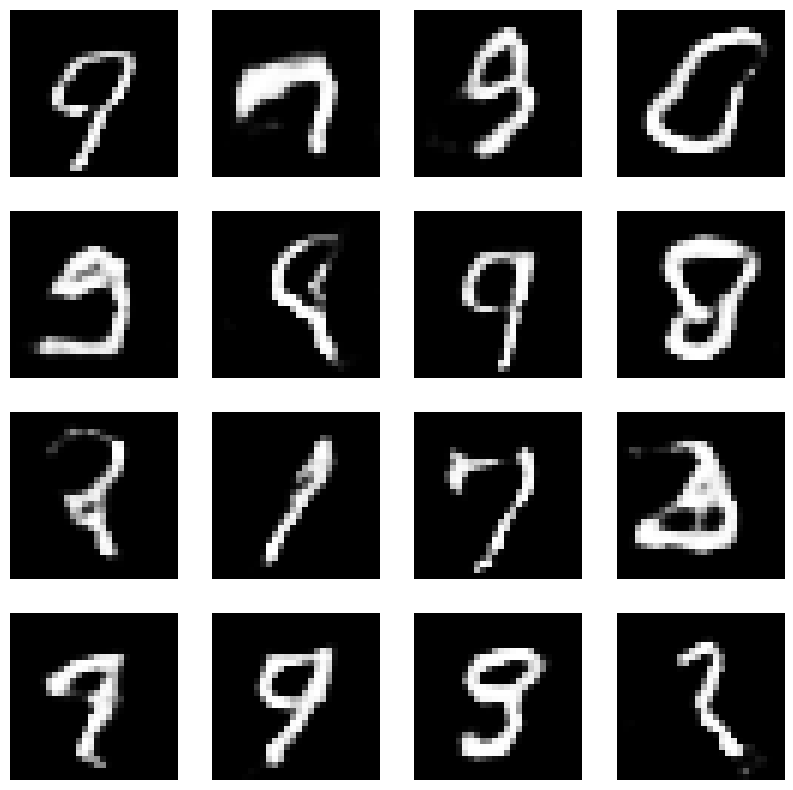

Epoch:  17


2024-05-18 05:33:24.225043: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


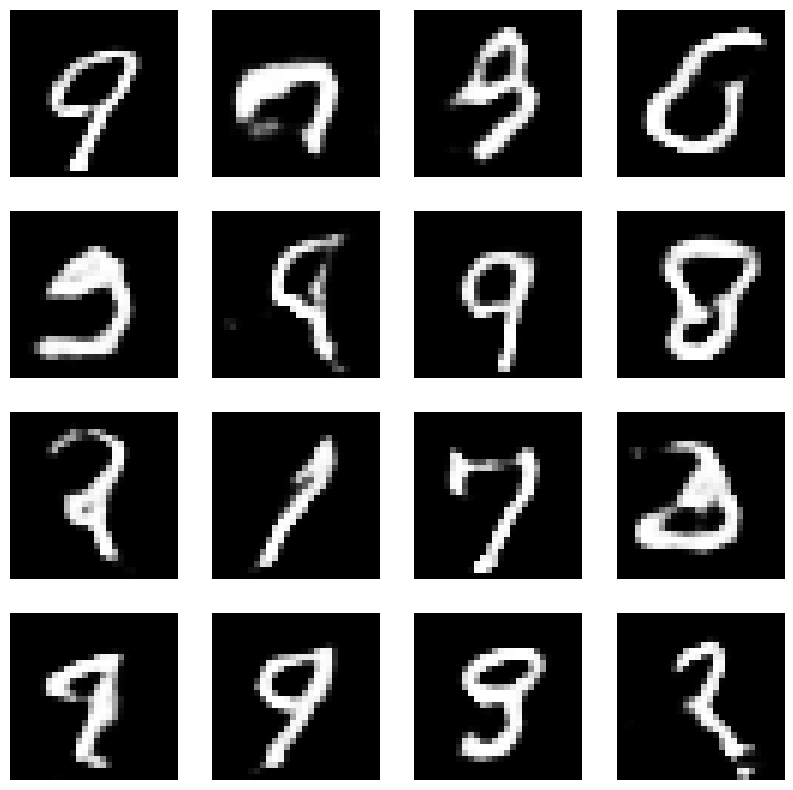

Epoch:  18


2024-05-18 05:35:54.921771: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


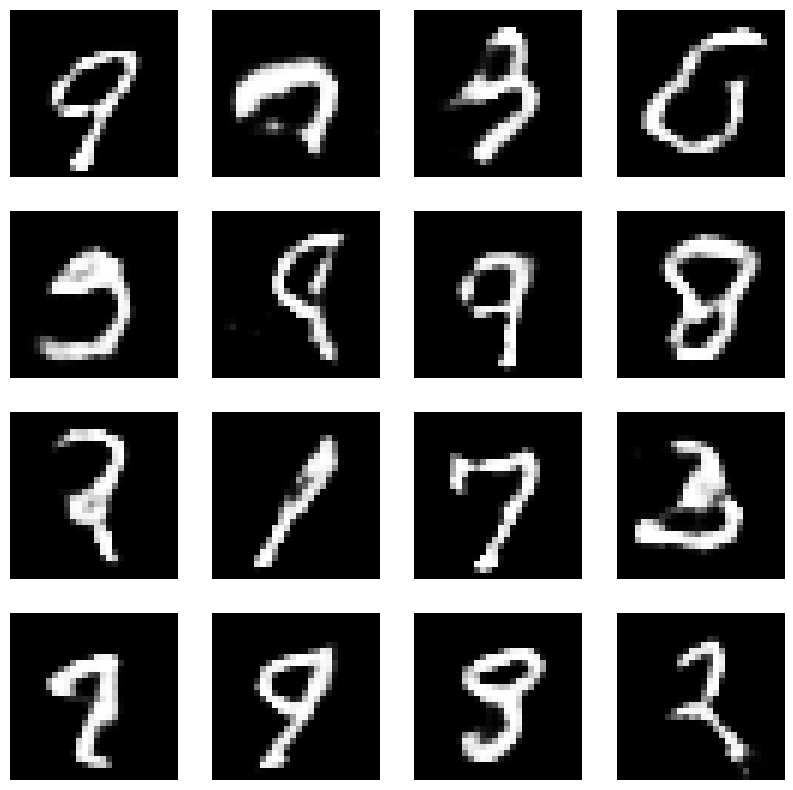

Epoch:  19


2024-05-18 05:38:25.072429: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


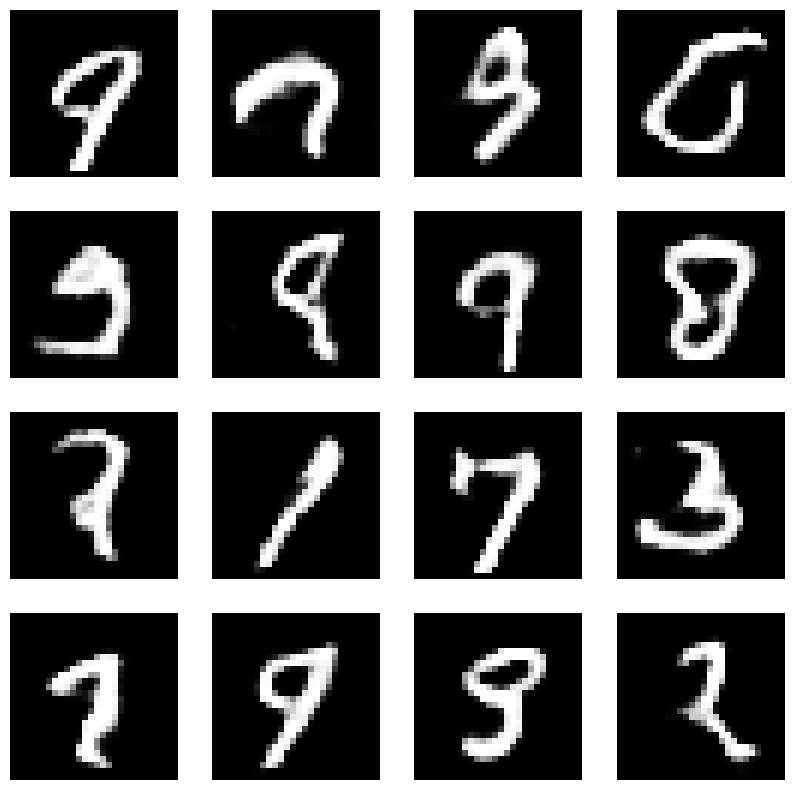

Epoch:  20


2024-05-18 05:40:54.989872: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


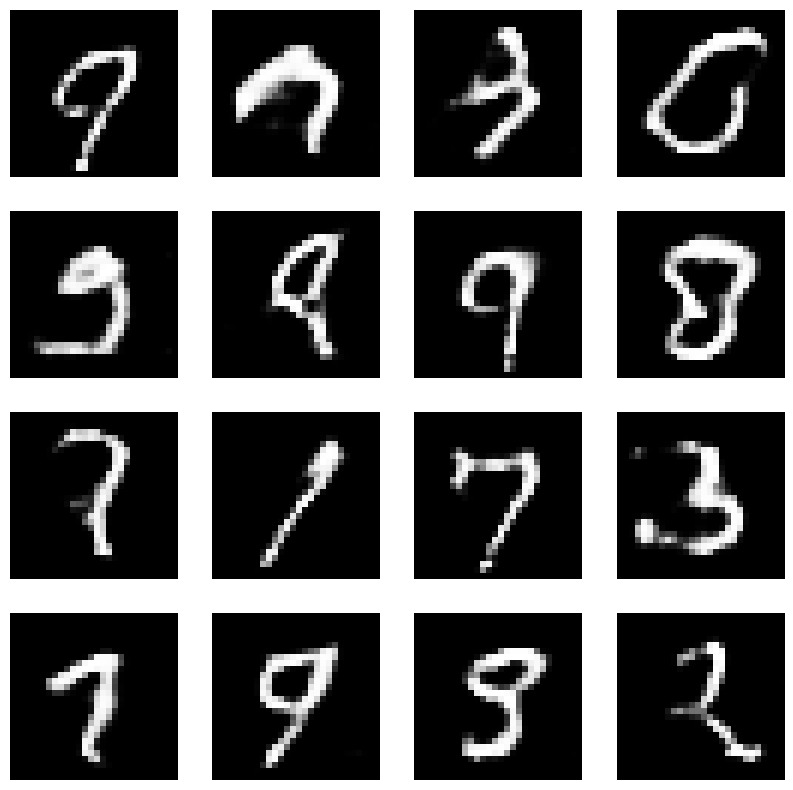

Epoch:  21


2024-05-18 05:43:24.938898: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


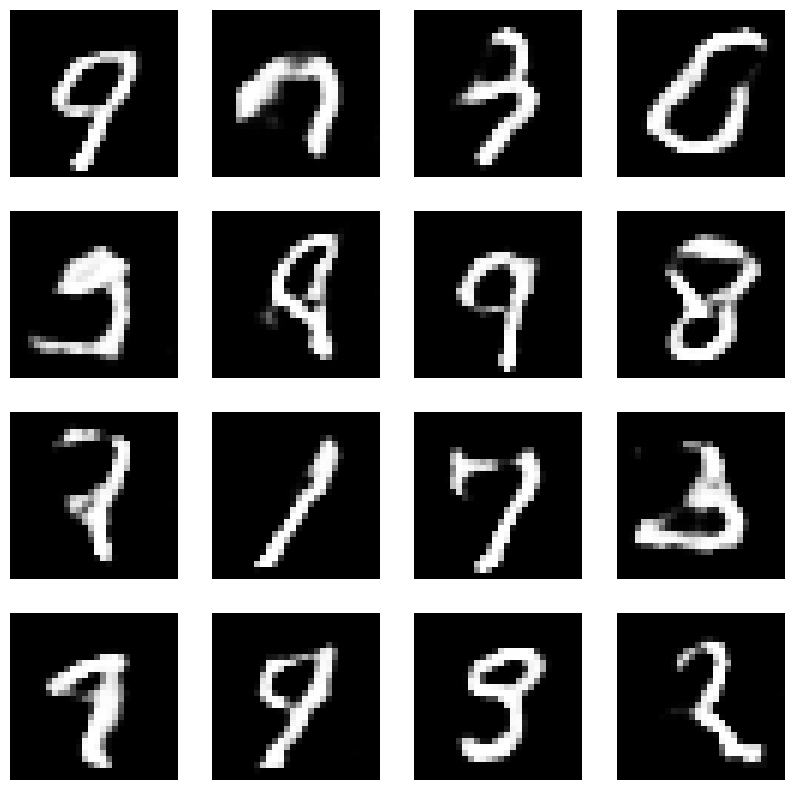

2024-05-18 05:45:54.714789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch:  22


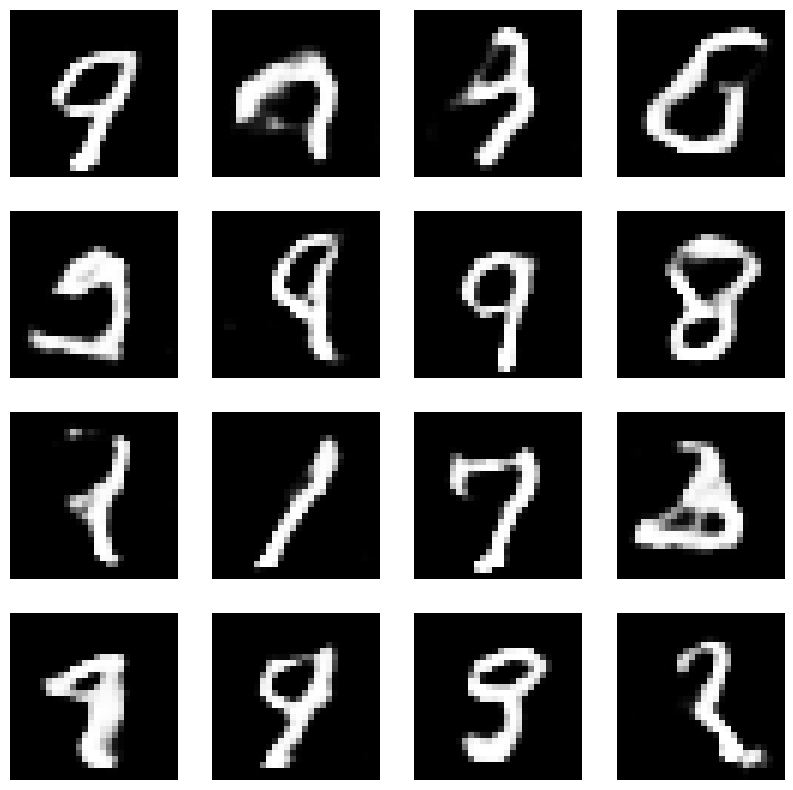

Epoch:  23


2024-05-18 05:48:25.731379: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


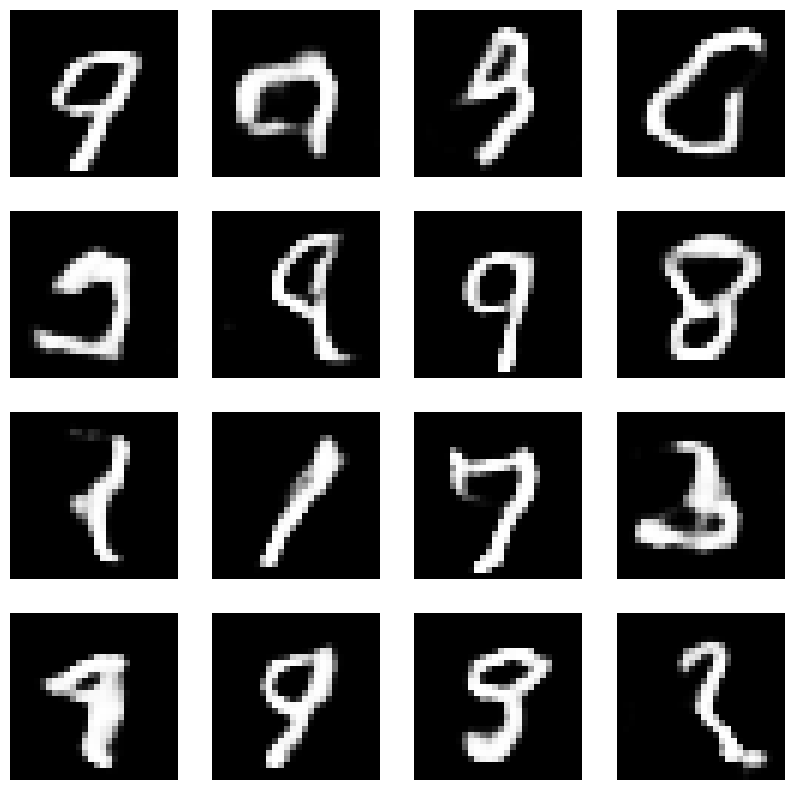

Epoch:  24


2024-05-18 05:50:55.957172: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


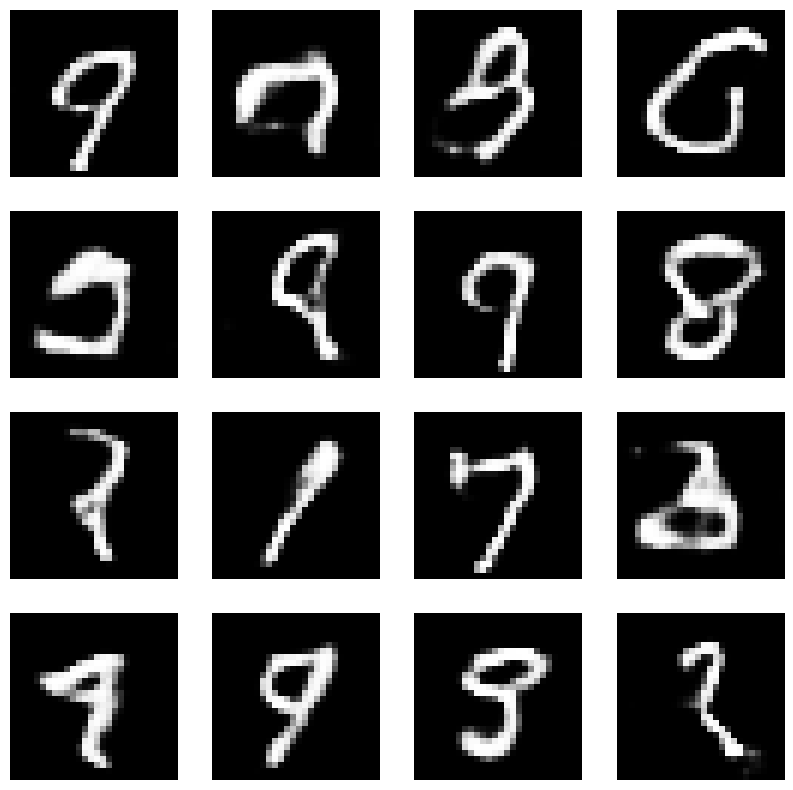

Epoch:  25


2024-05-18 05:53:26.227669: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


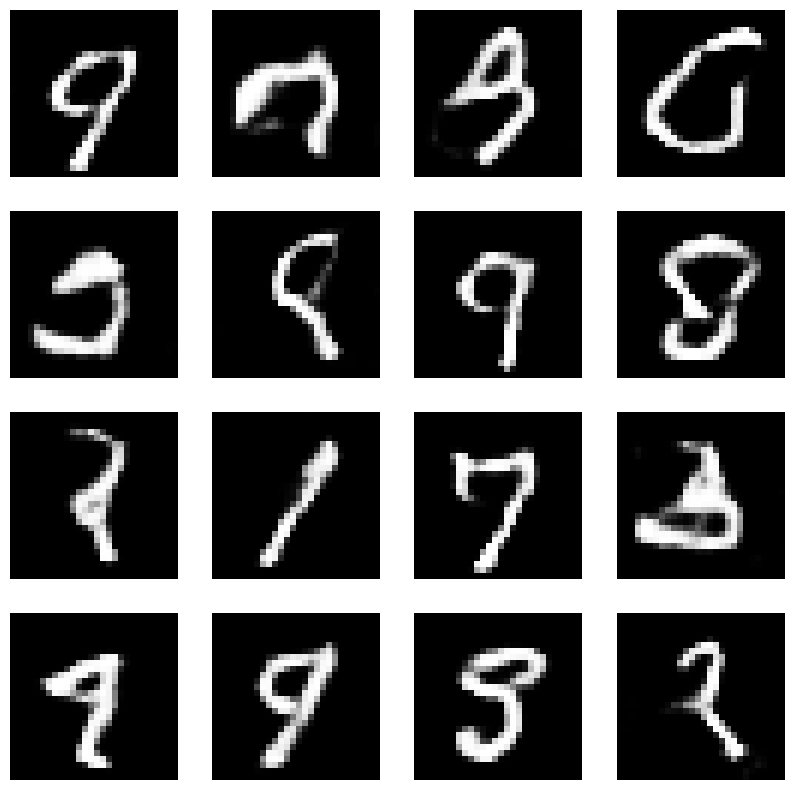

Epoch:  26


2024-05-18 05:55:56.812246: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


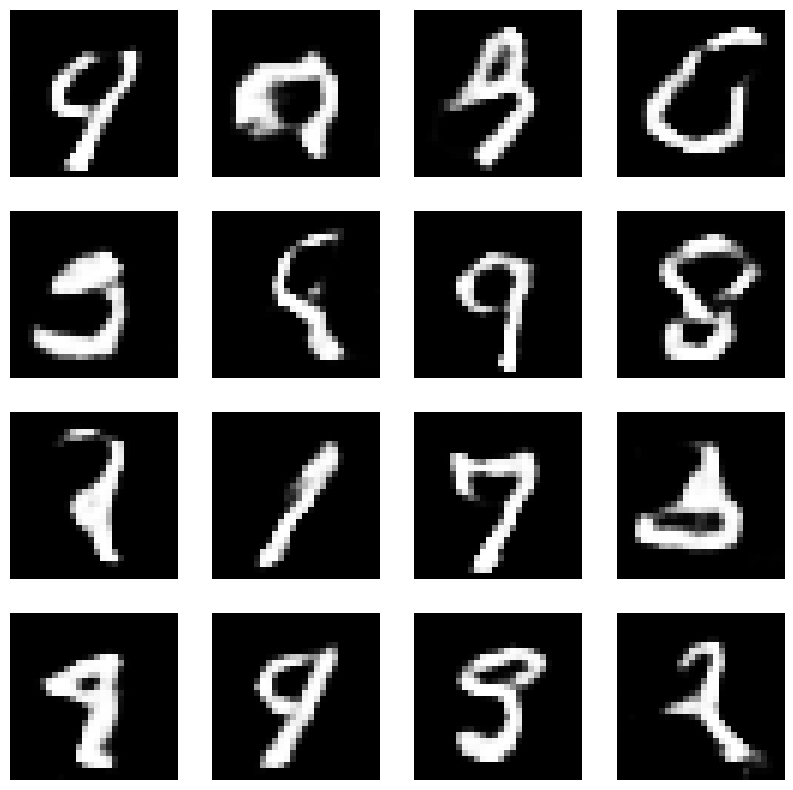

Epoch:  27


2024-05-18 05:58:24.578238: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


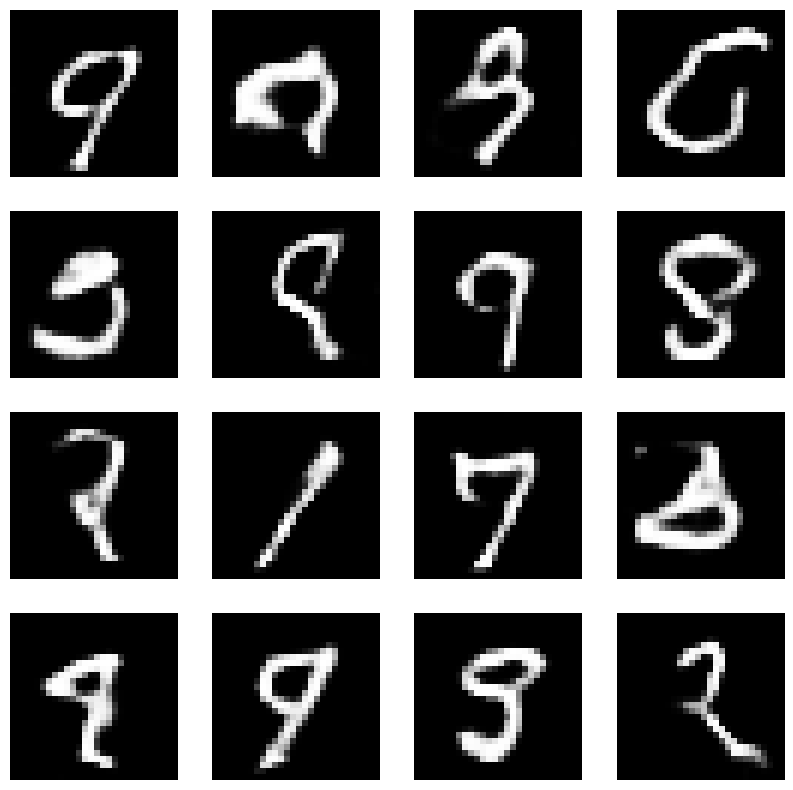

Epoch:  28


2024-05-18 06:00:47.167079: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


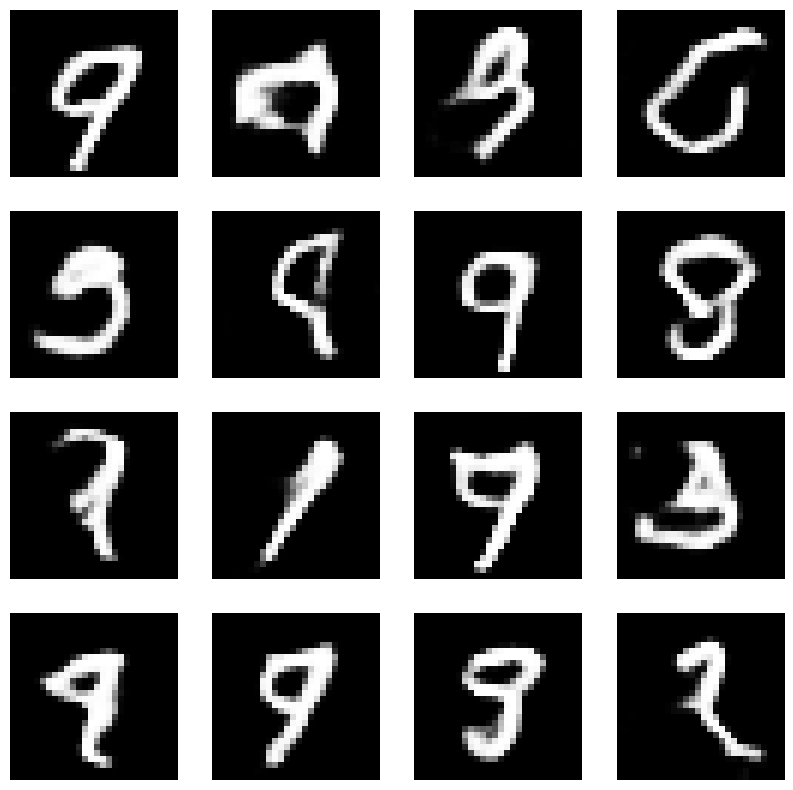

Epoch:  29


2024-05-18 06:03:05.224407: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


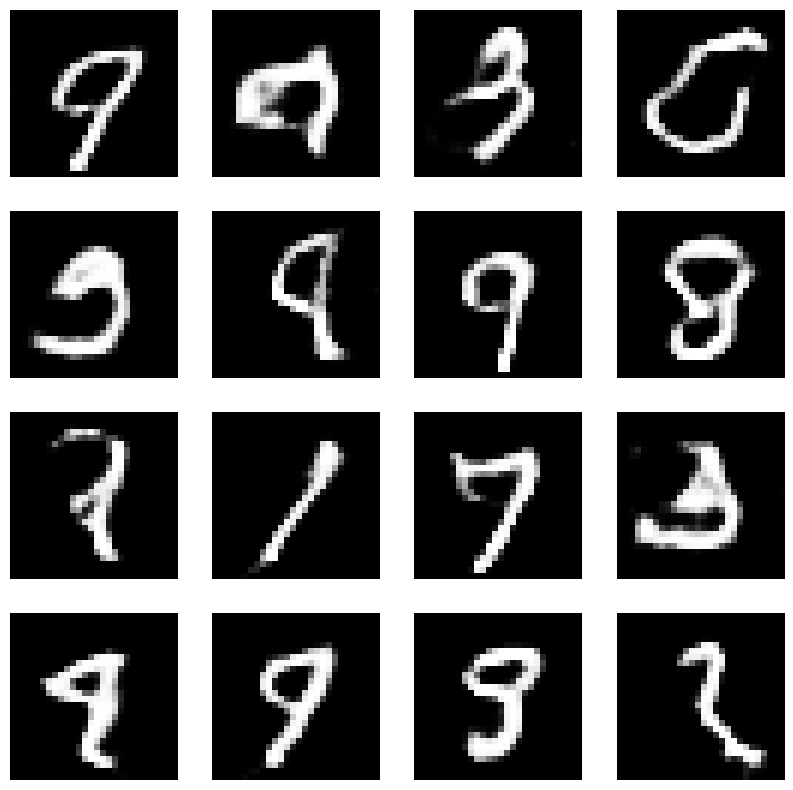

Epoch:  30


2024-05-18 06:05:19.623077: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


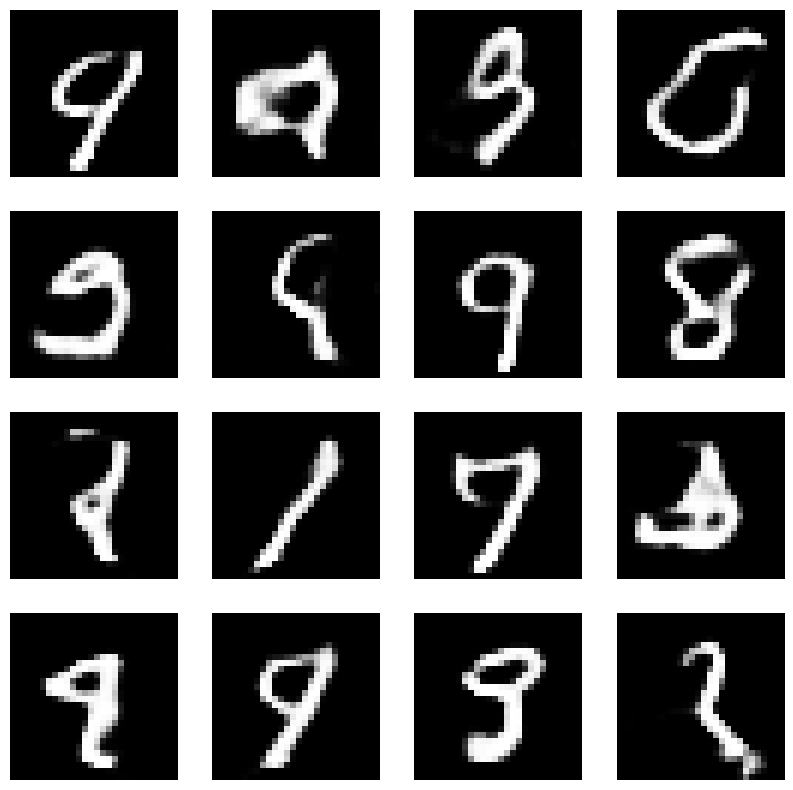

Epoch:  31


2024-05-18 06:07:33.886547: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


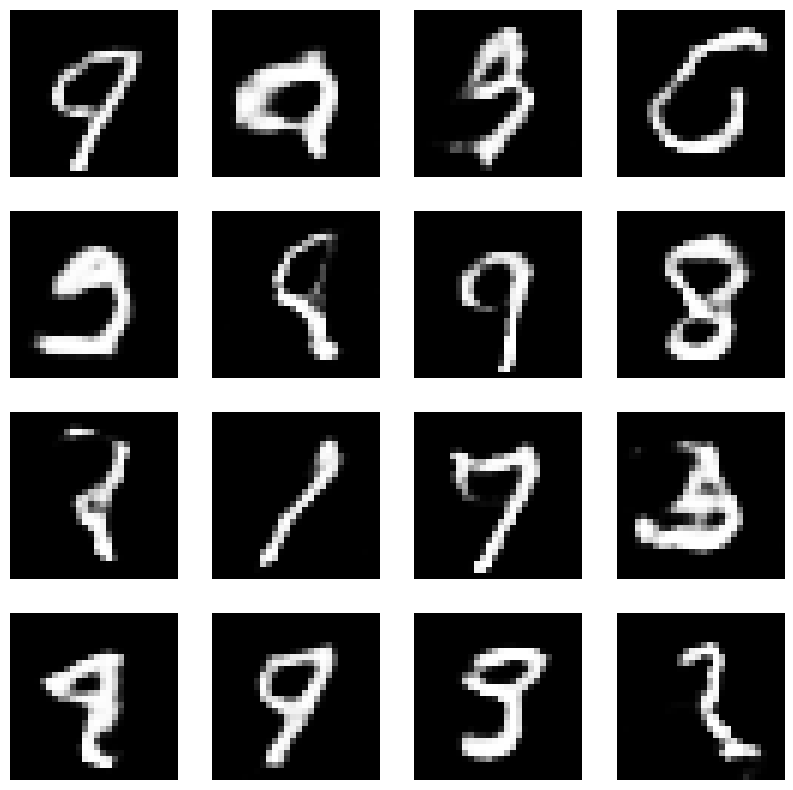

Epoch:  32


2024-05-18 06:09:48.435764: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


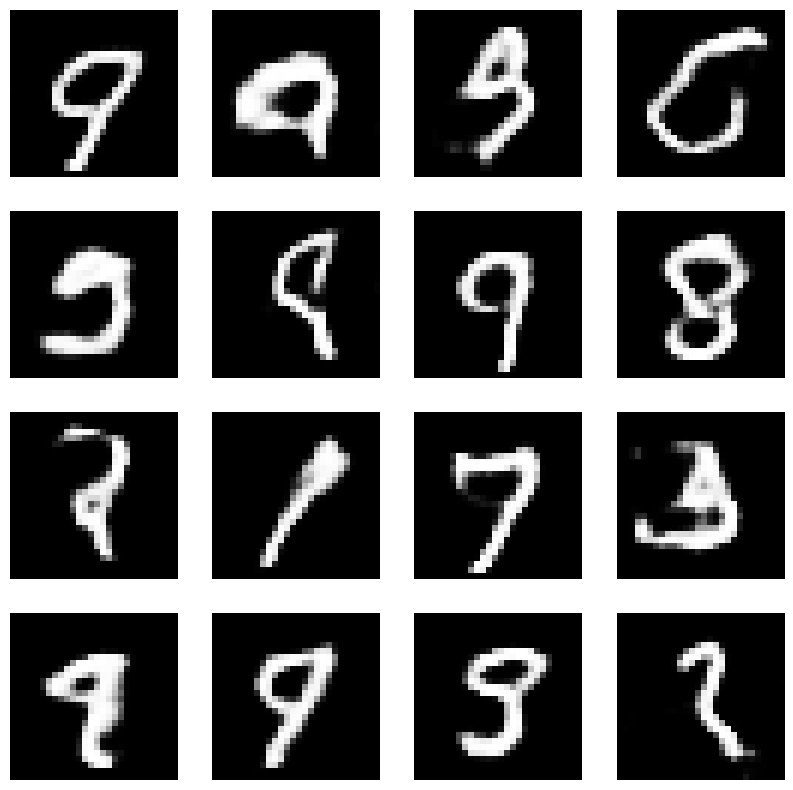

2024-05-18 06:12:03.019893: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch:  33


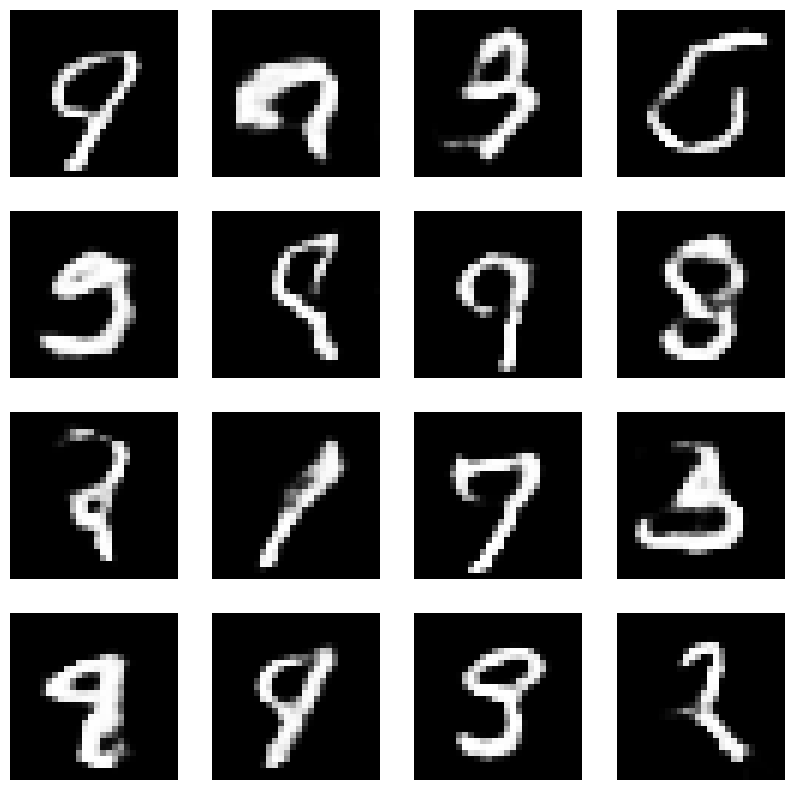

Epoch:  34


2024-05-18 06:14:18.337073: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


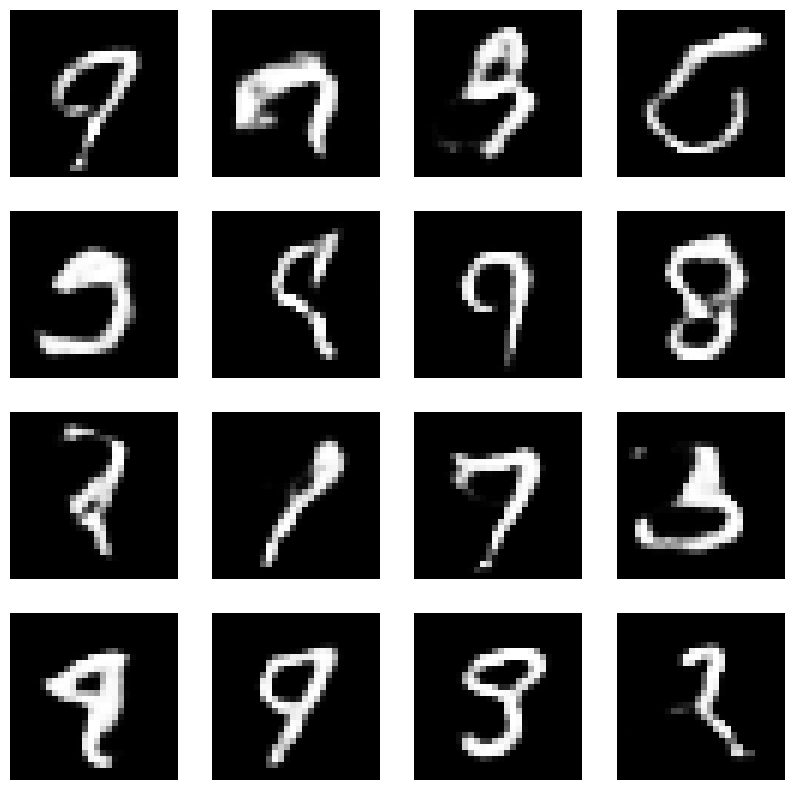

Epoch:  35


2024-05-18 06:16:33.051998: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


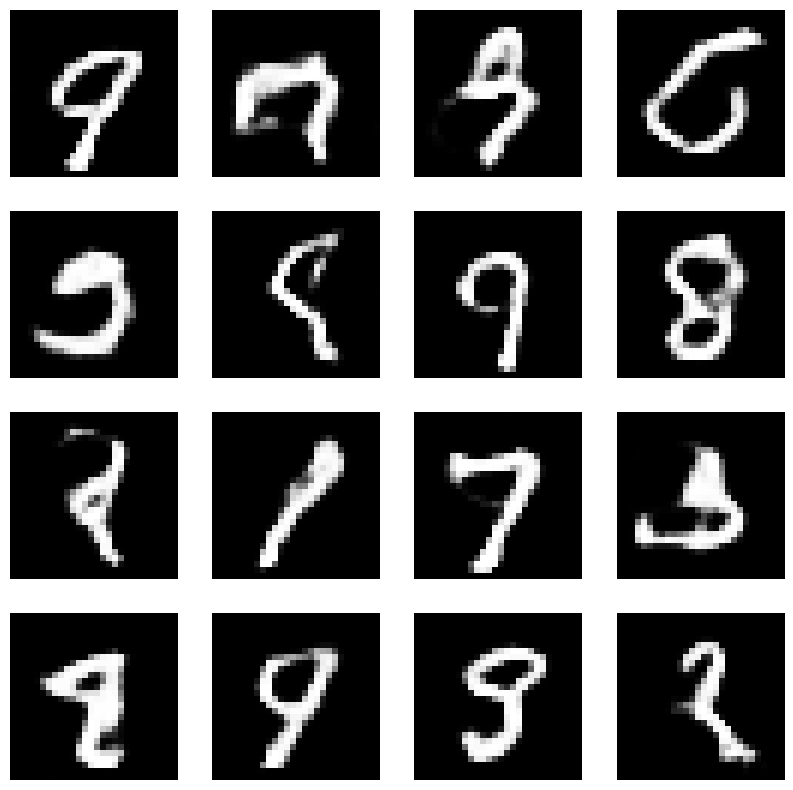

Epoch:  36


2024-05-18 06:18:48.378466: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


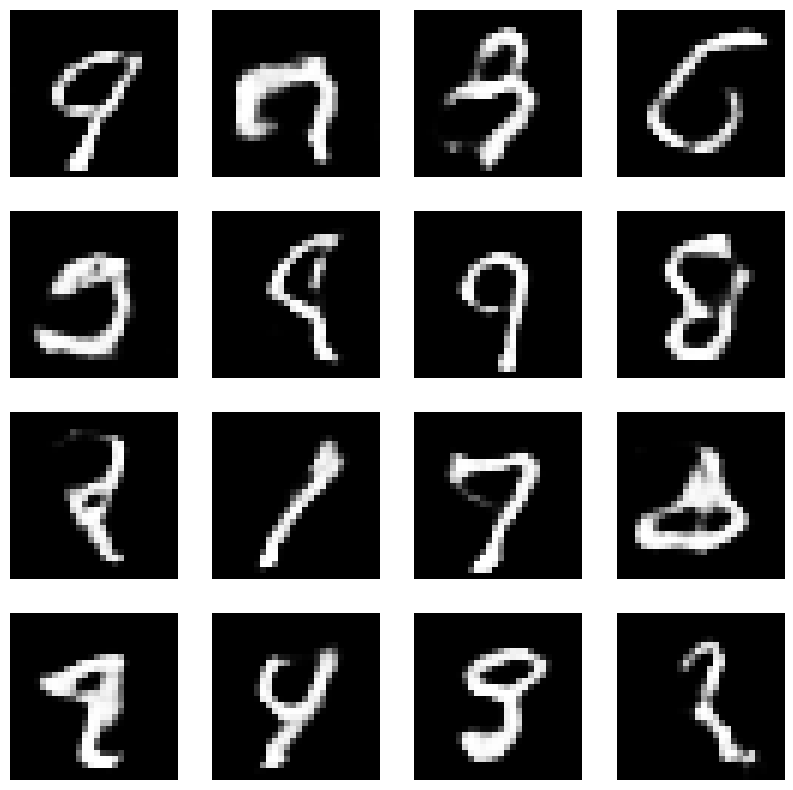

Epoch:  37


2024-05-18 06:21:03.634482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


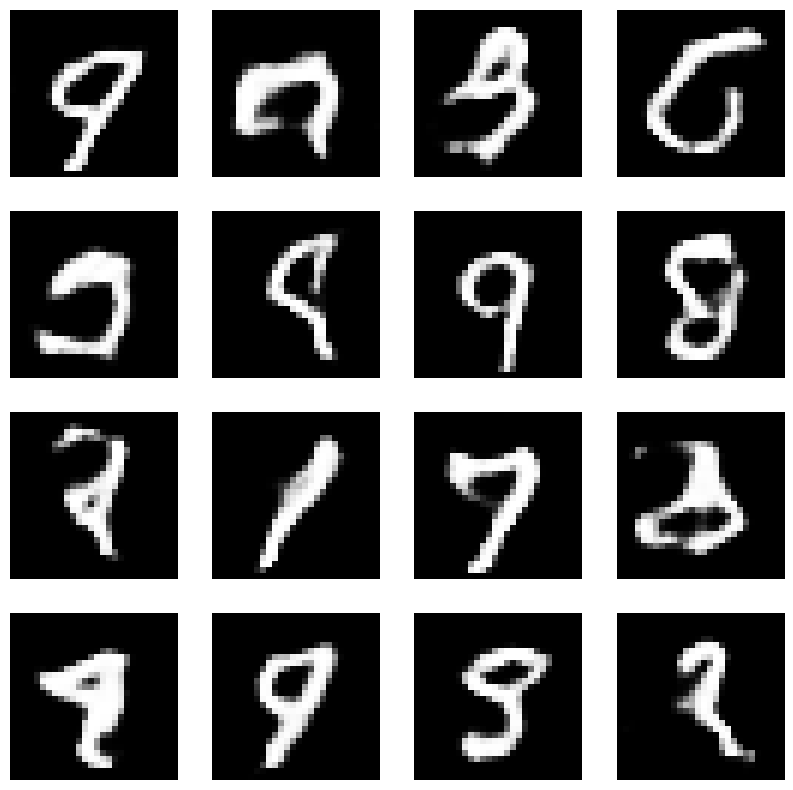

Epoch:  38


2024-05-18 06:23:18.715930: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


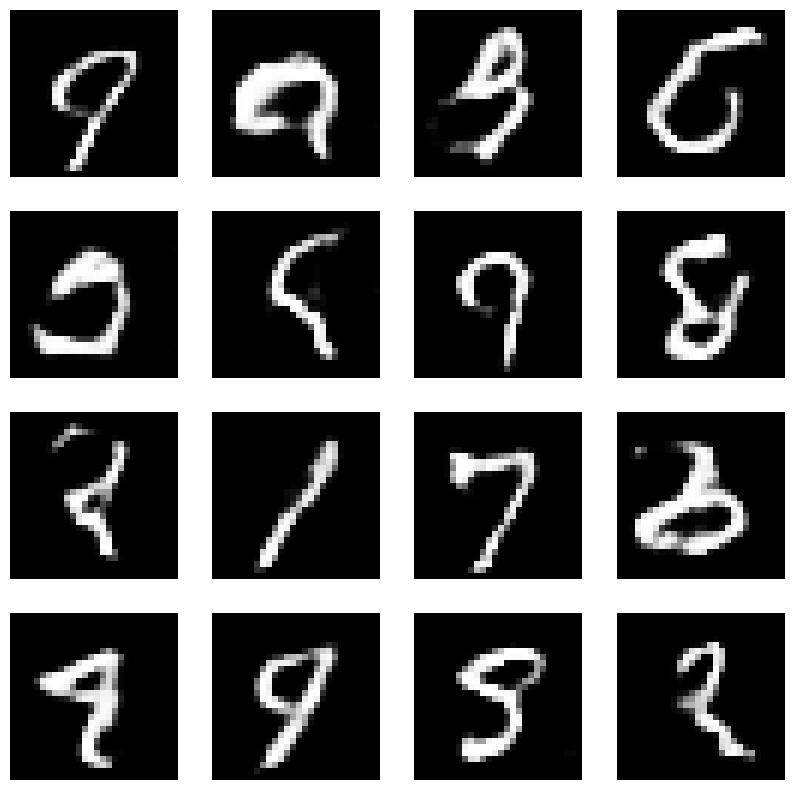

Epoch:  39


2024-05-18 06:25:33.613017: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


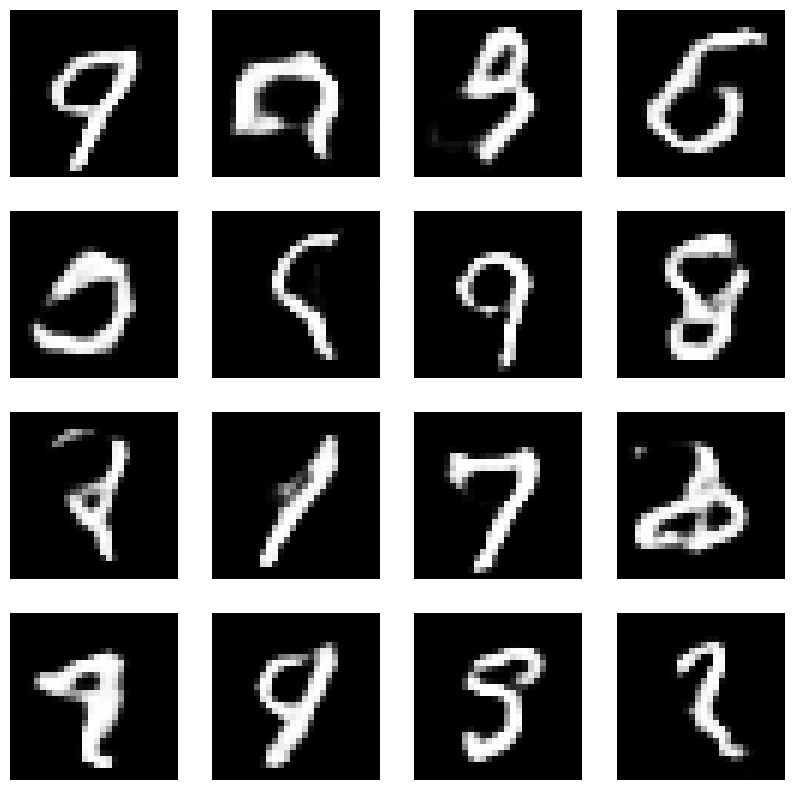

Epoch:  40


2024-05-18 06:27:48.785018: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


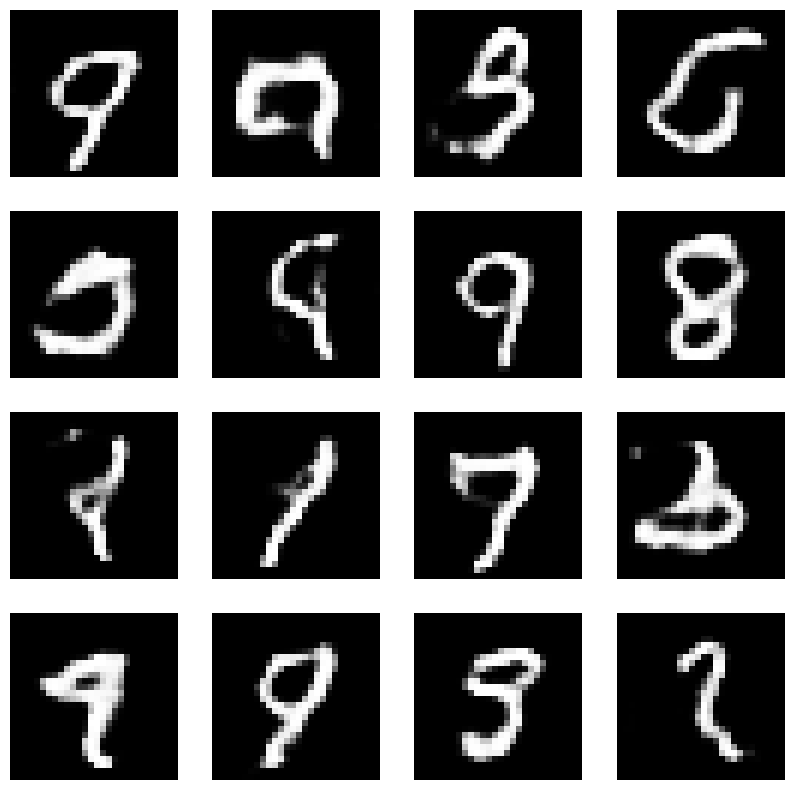

Epoch:  41


2024-05-18 06:30:03.892723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


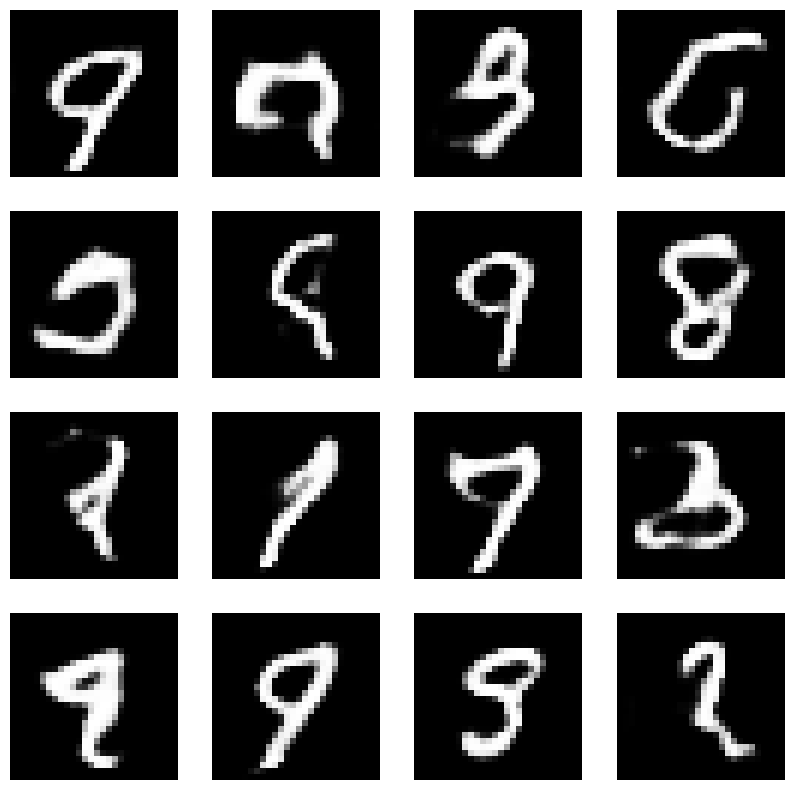

Epoch:  42


2024-05-18 06:32:19.177356: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


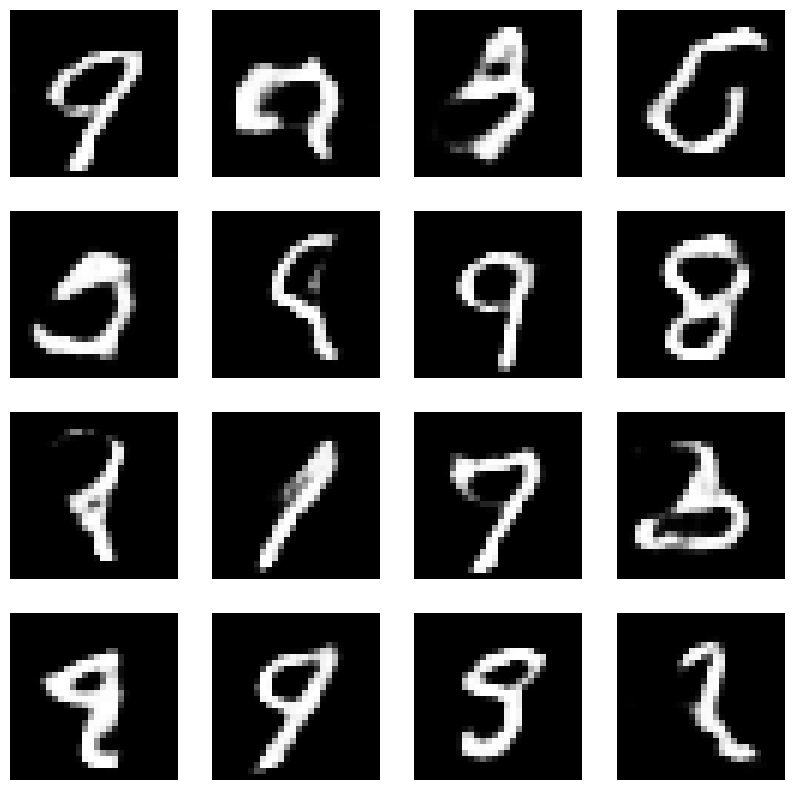

Epoch:  43


2024-05-18 06:34:37.683077: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


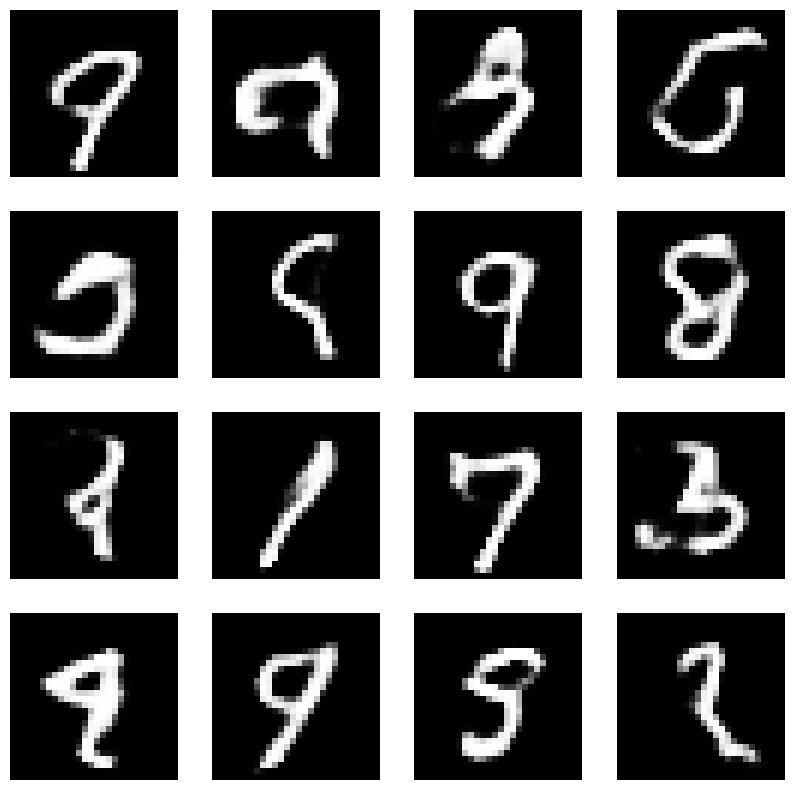

Epoch:  44


2024-05-18 06:37:00.195434: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


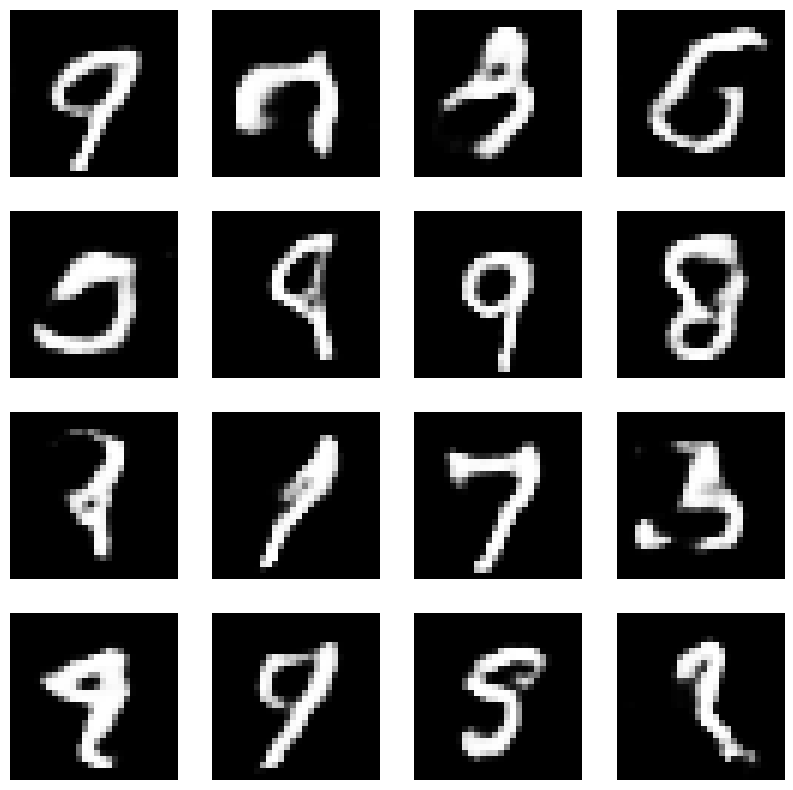

2024-05-18 06:39:27.025785: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch:  45


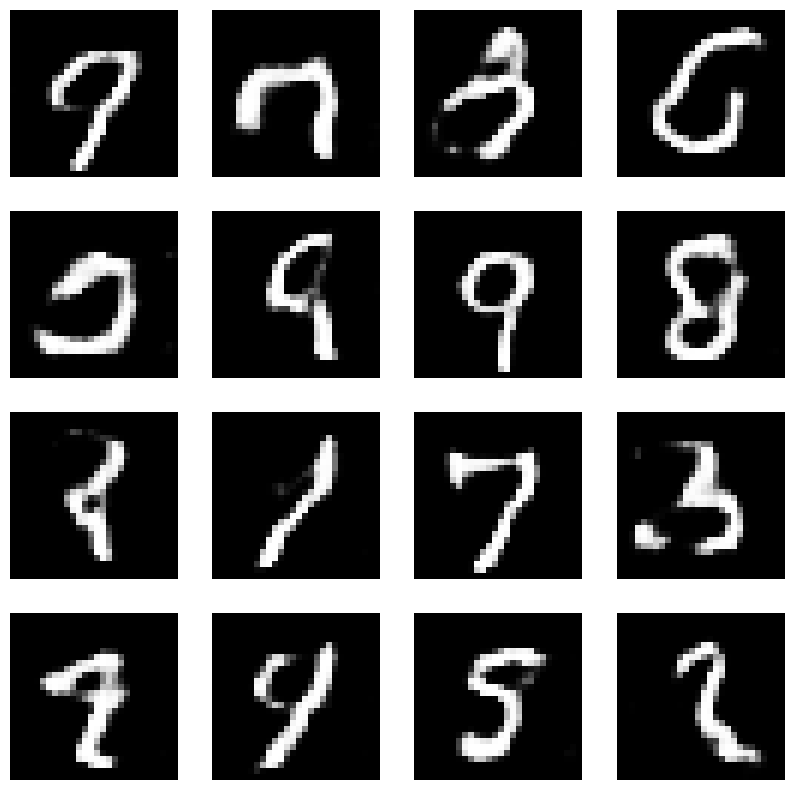

Epoch:  46


2024-05-18 06:41:56.324978: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


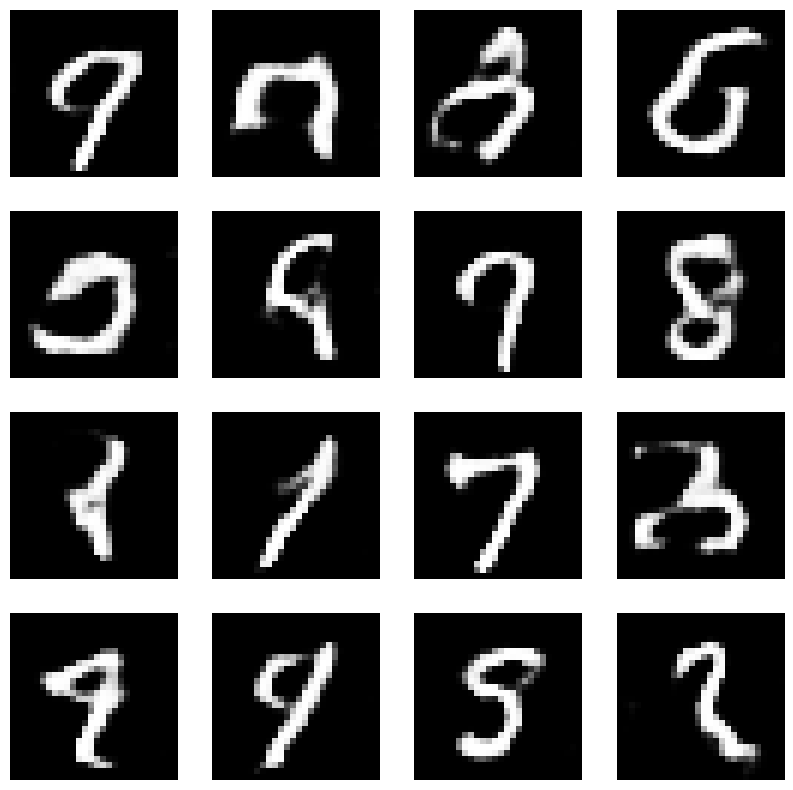

Epoch:  47


2024-05-18 06:44:24.155553: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


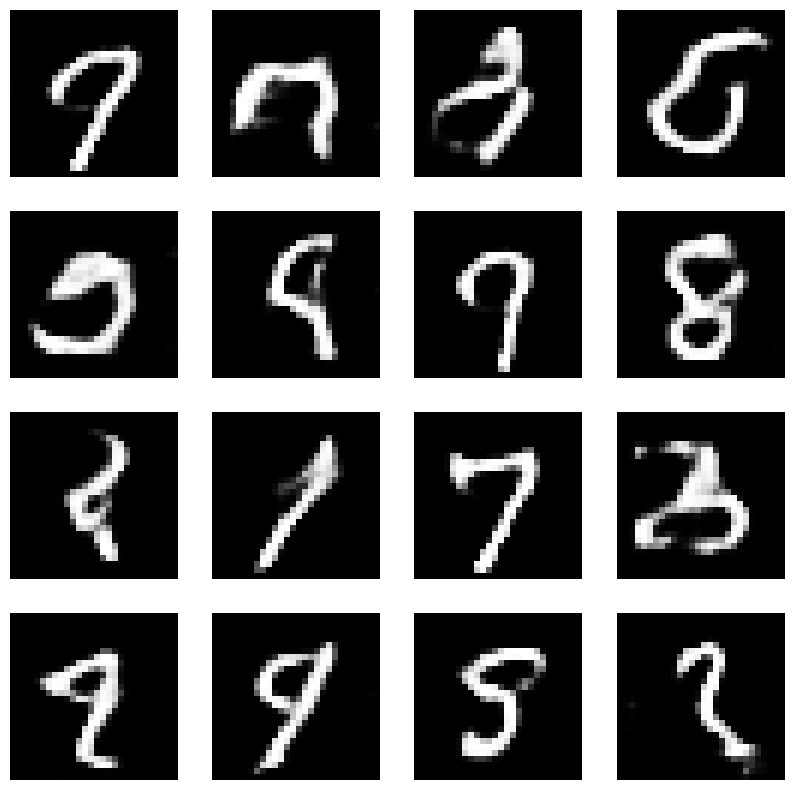

Epoch:  48


2024-05-18 06:46:51.760077: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


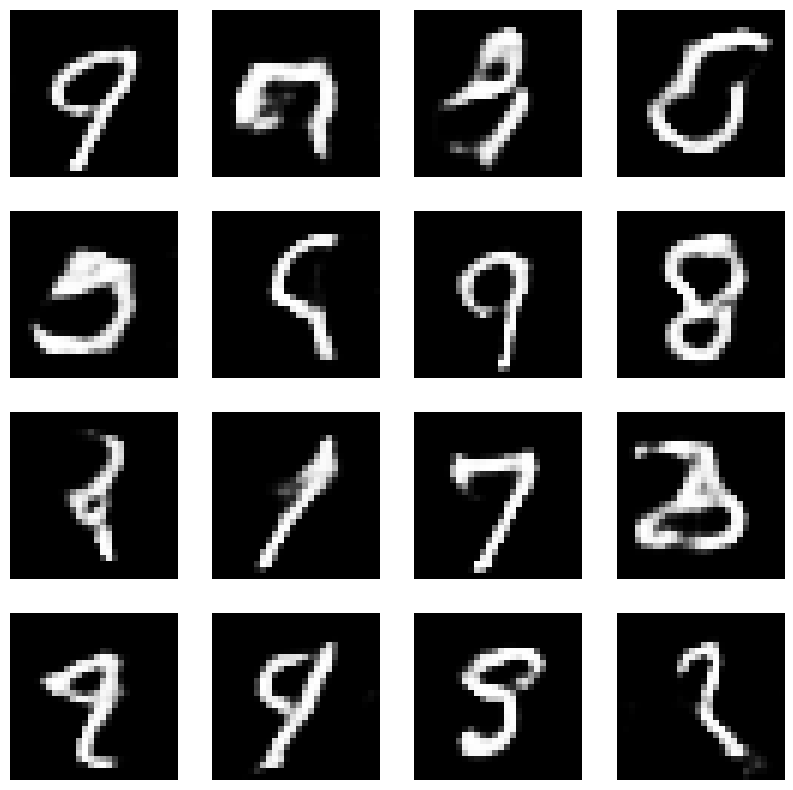

Epoch:  49


2024-05-18 06:49:19.939954: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


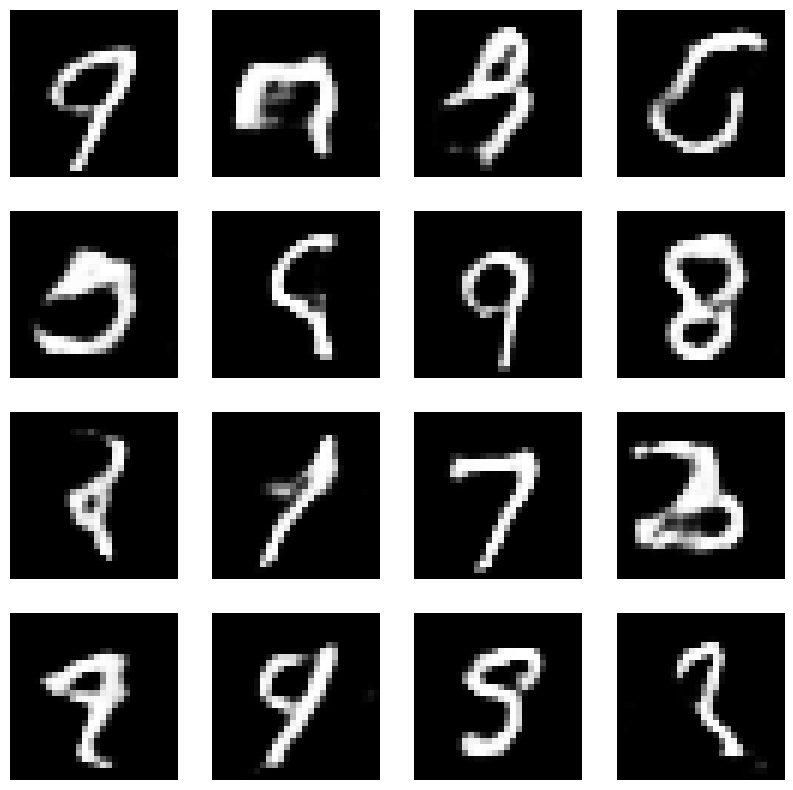

Epoch:  50


2024-05-18 06:51:47.846413: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


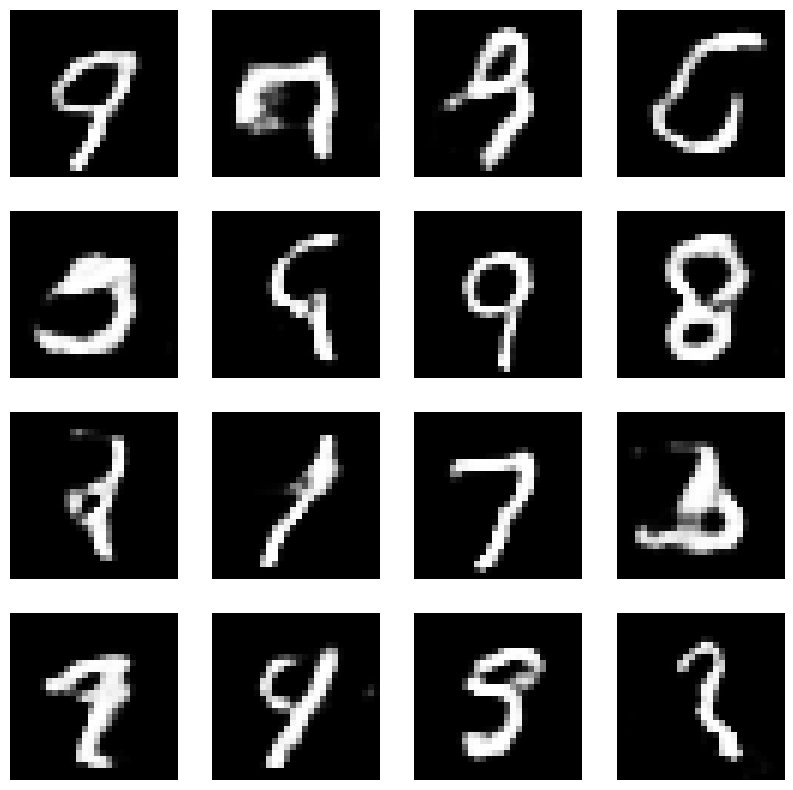

Epoch:  51


2024-05-18 06:54:15.535629: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


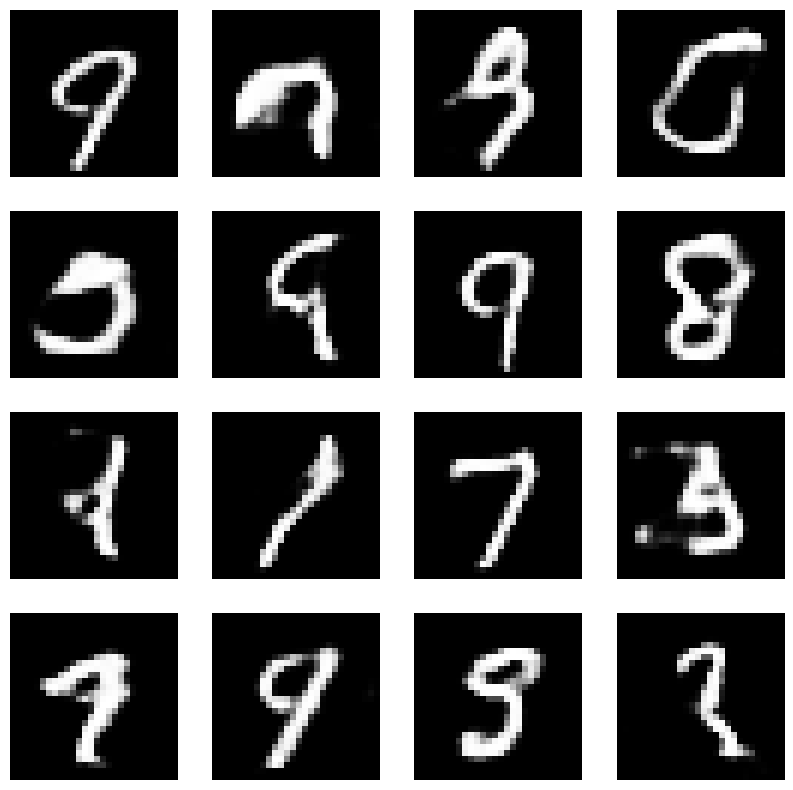

Epoch:  52


2024-05-18 06:56:43.466899: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


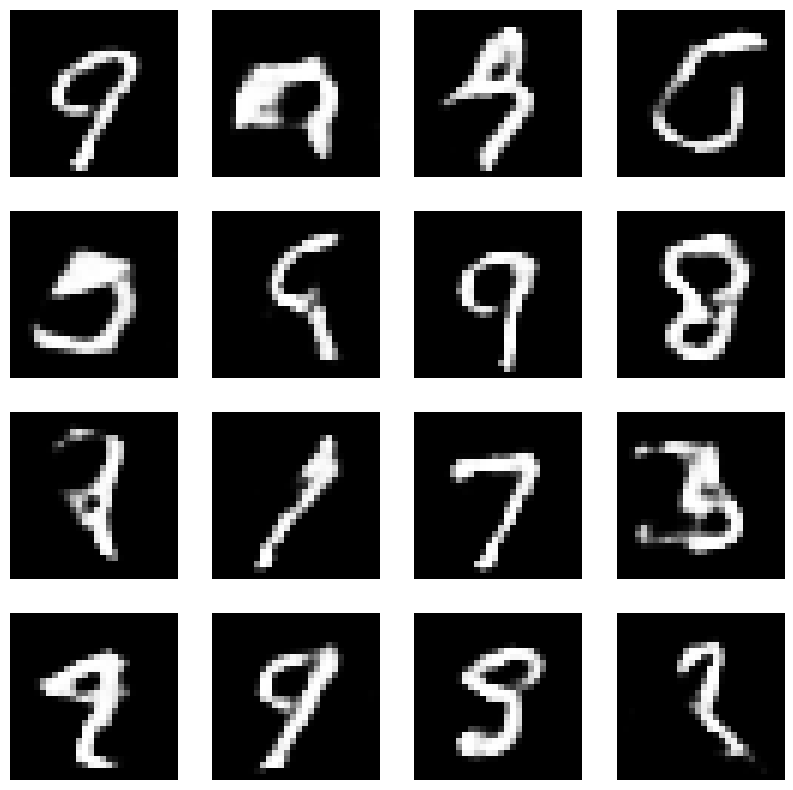

Epoch:  53


2024-05-18 06:59:11.742892: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


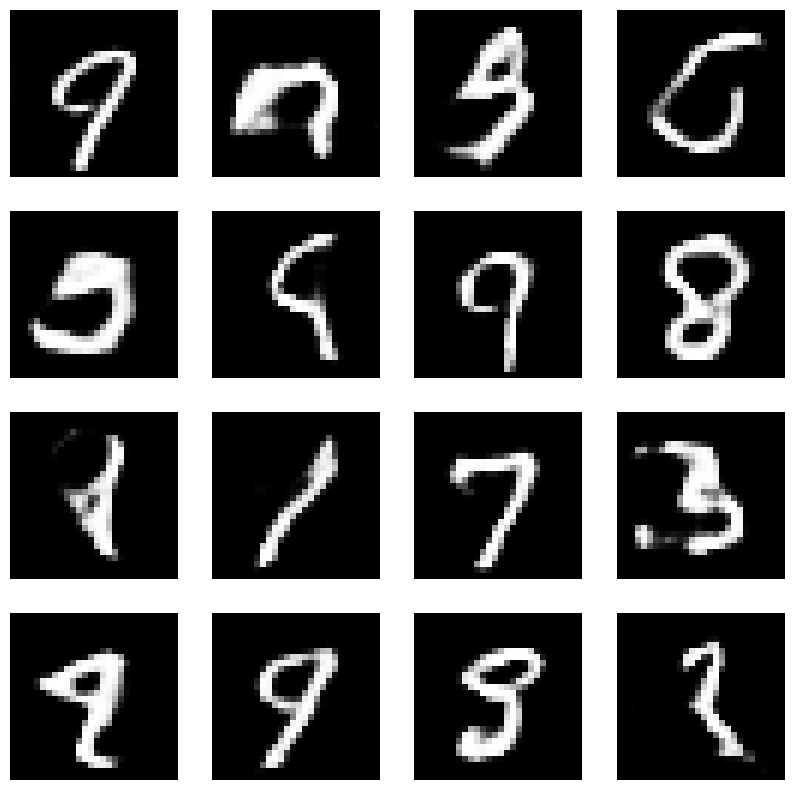

Epoch:  54


2024-05-18 07:01:39.622336: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


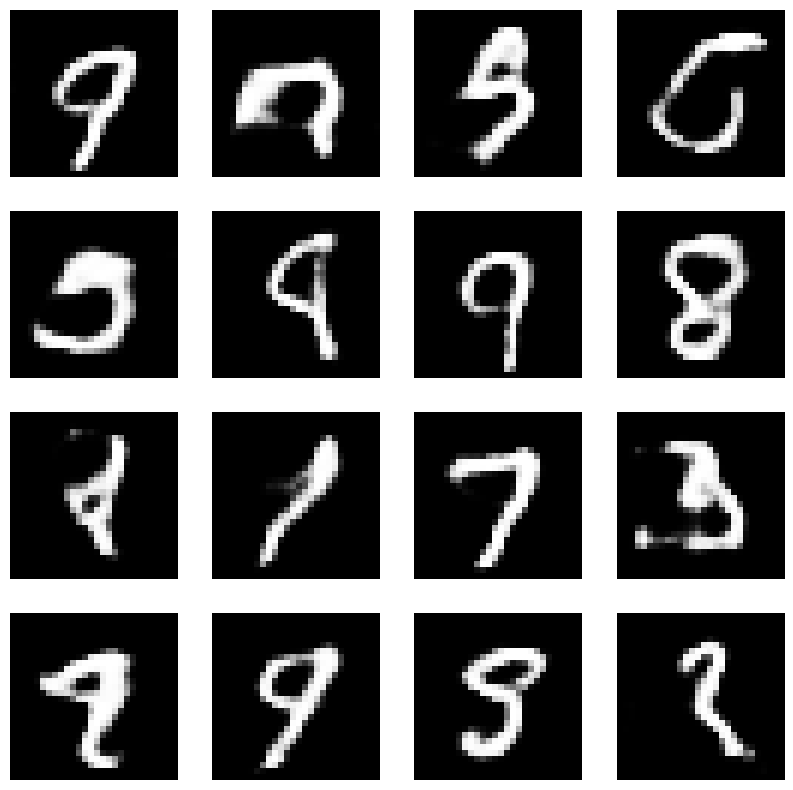

Epoch:  55


2024-05-18 07:04:07.636554: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


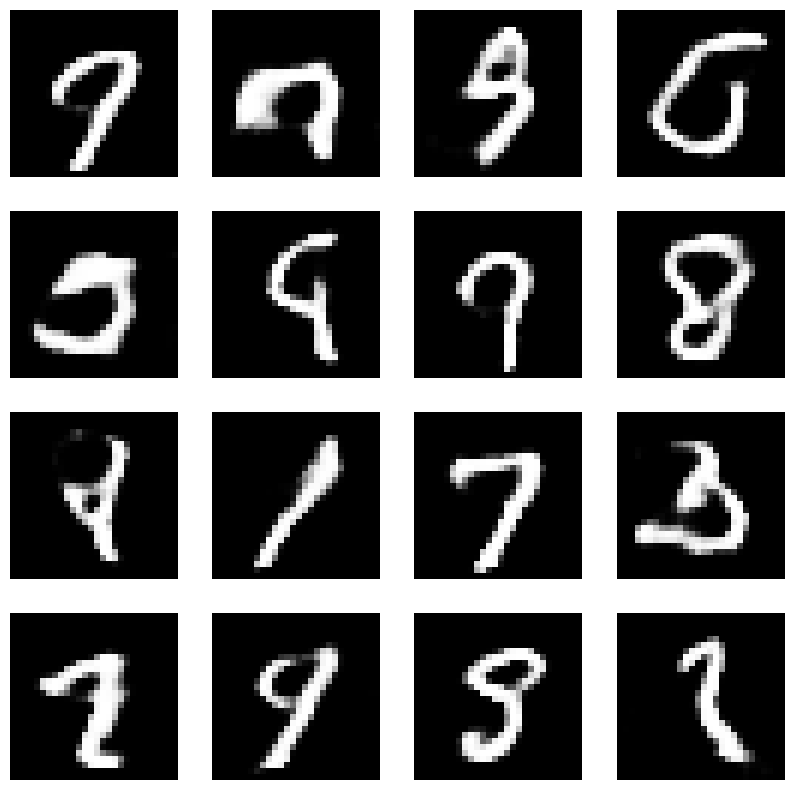

2024-05-18 07:06:35.612812: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch:  56


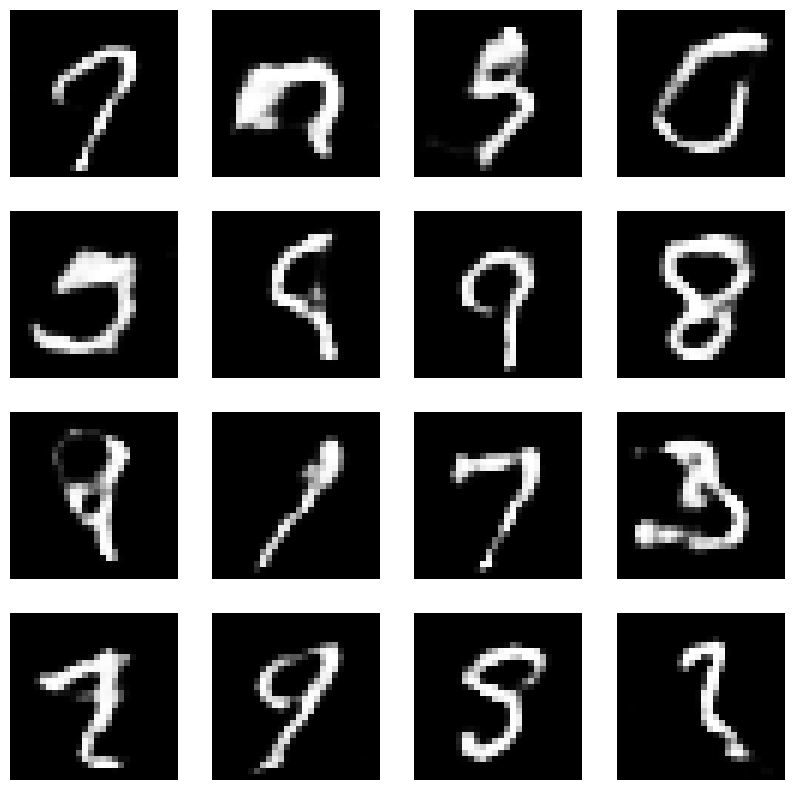

Epoch:  57


2024-05-18 07:09:04.148740: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


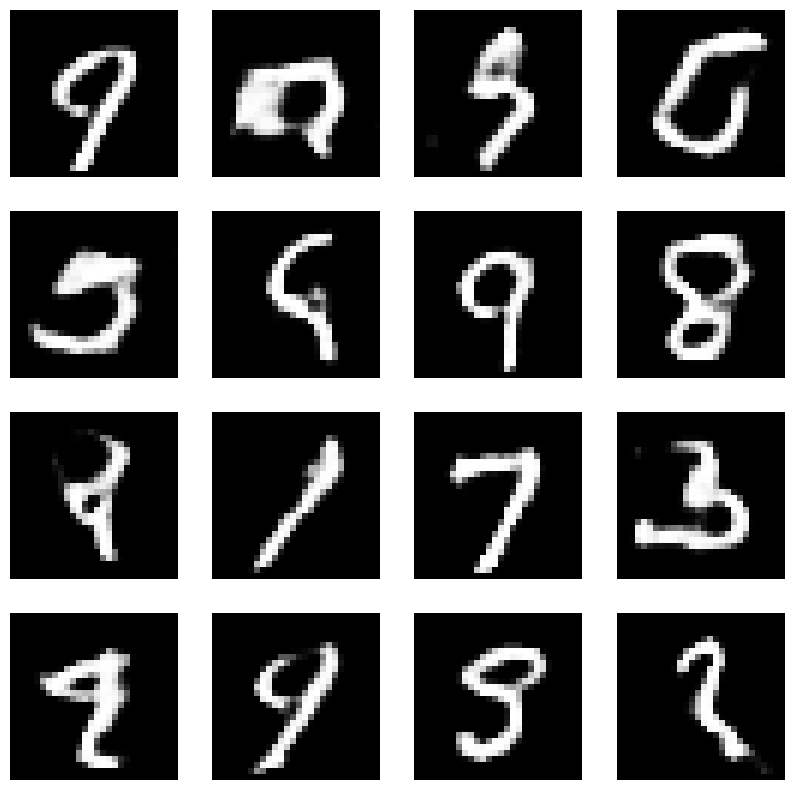

Epoch:  58


2024-05-18 07:11:32.508967: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


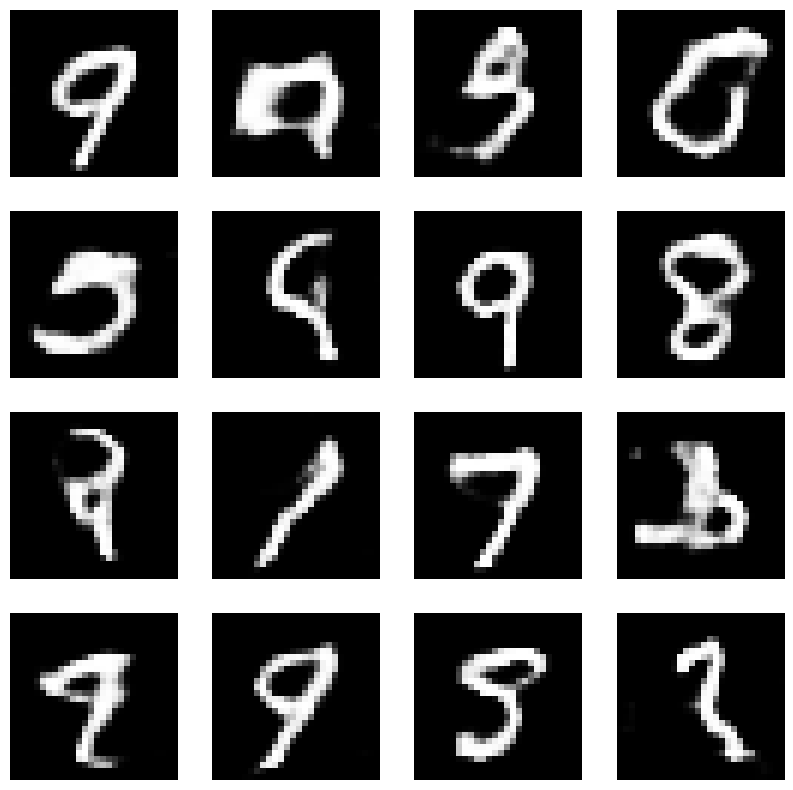

Epoch:  59


2024-05-18 07:14:00.819690: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


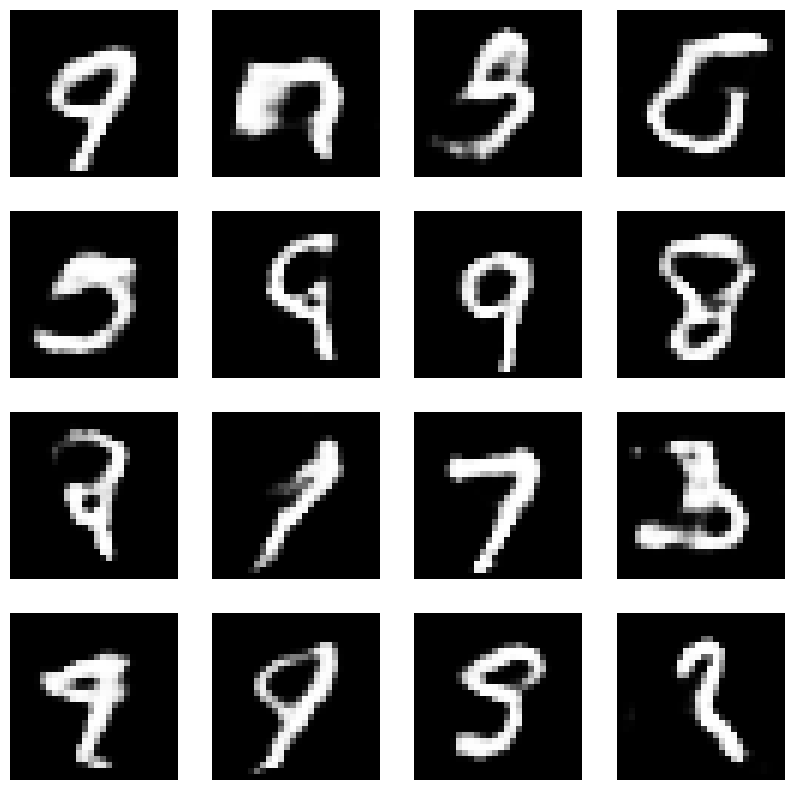

Epoch:  60


2024-05-18 07:16:26.245326: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


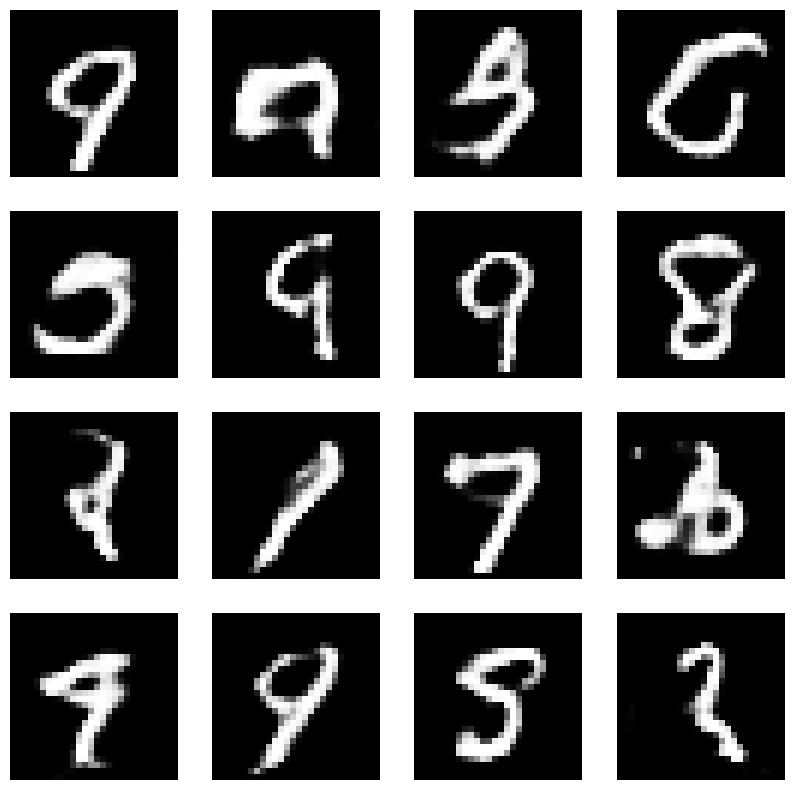

Epoch:  61


2024-05-18 07:18:46.638791: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


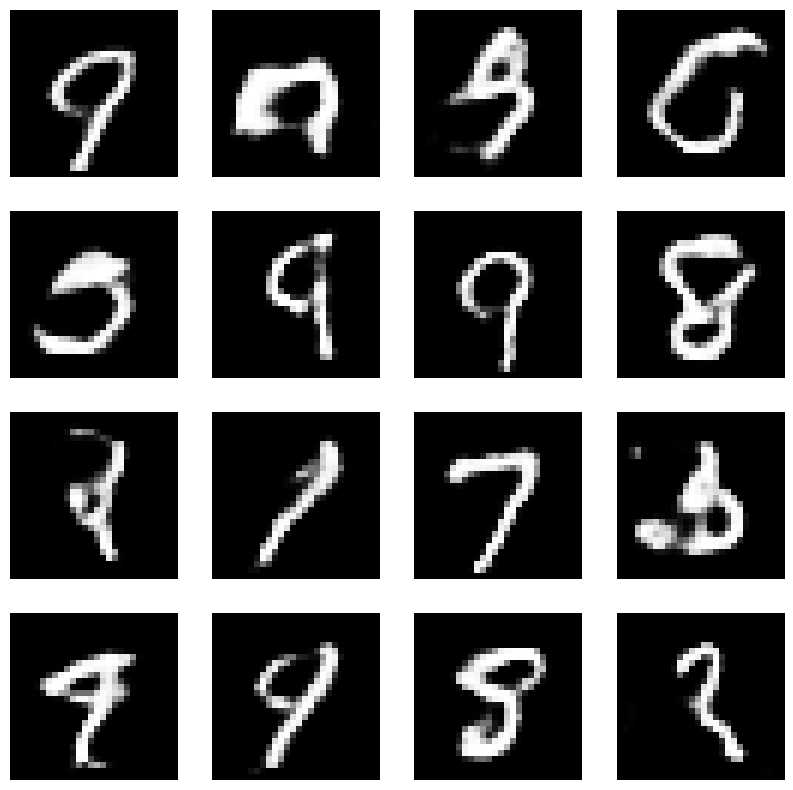

Epoch:  62


2024-05-18 07:21:03.783956: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


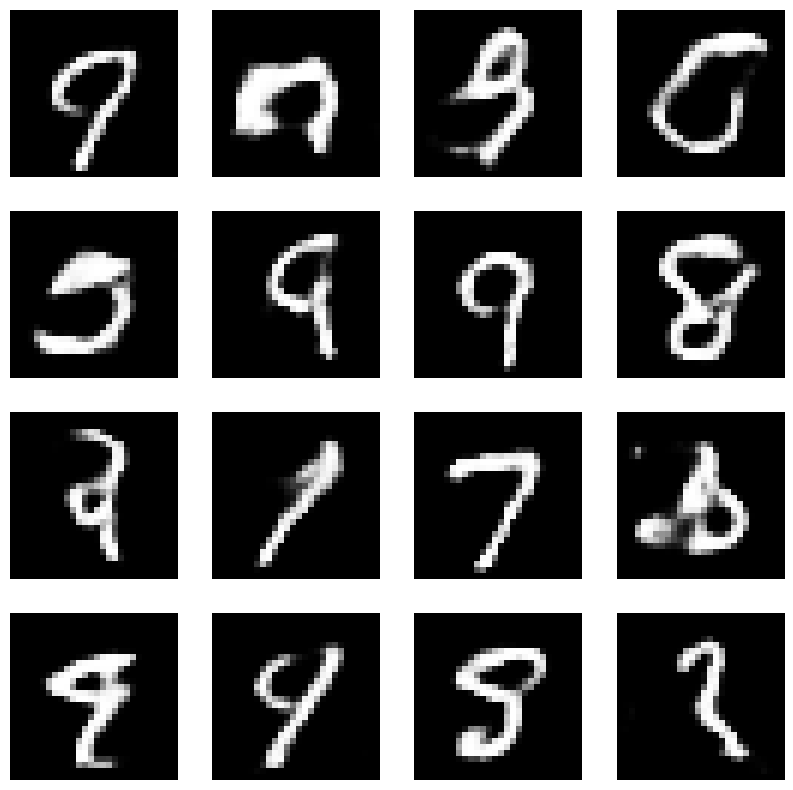

Epoch:  63


2024-05-18 07:23:21.258232: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


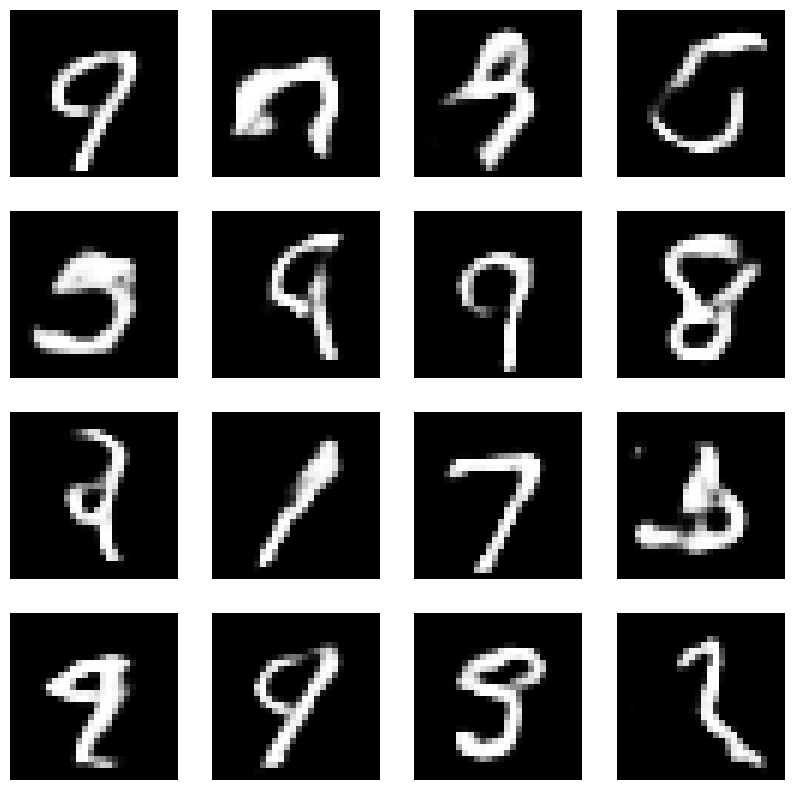

Epoch:  64


2024-05-18 07:25:38.946393: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


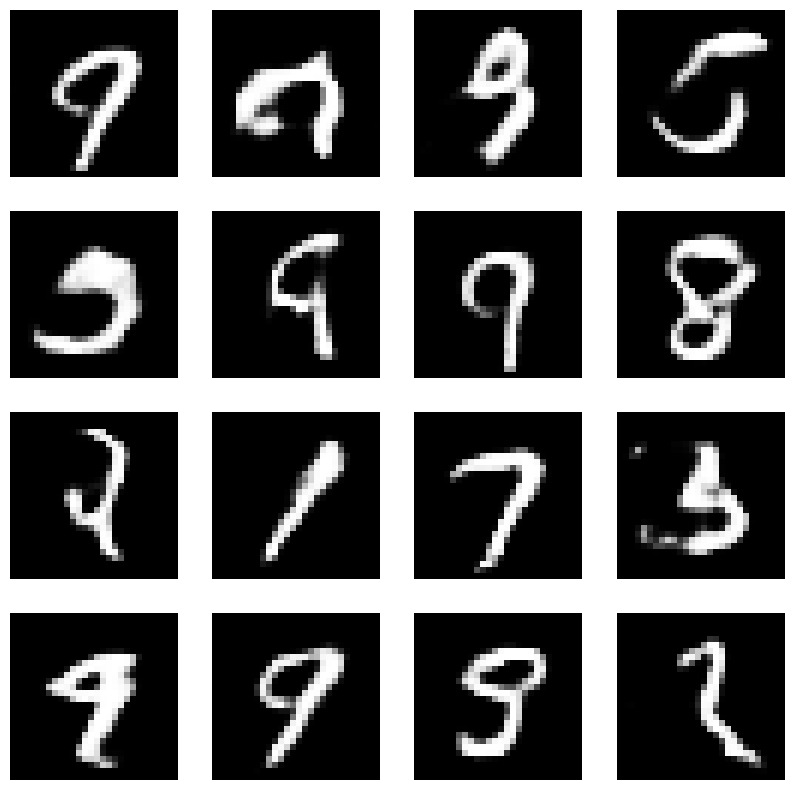

Epoch:  65


2024-05-18 07:27:56.582397: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


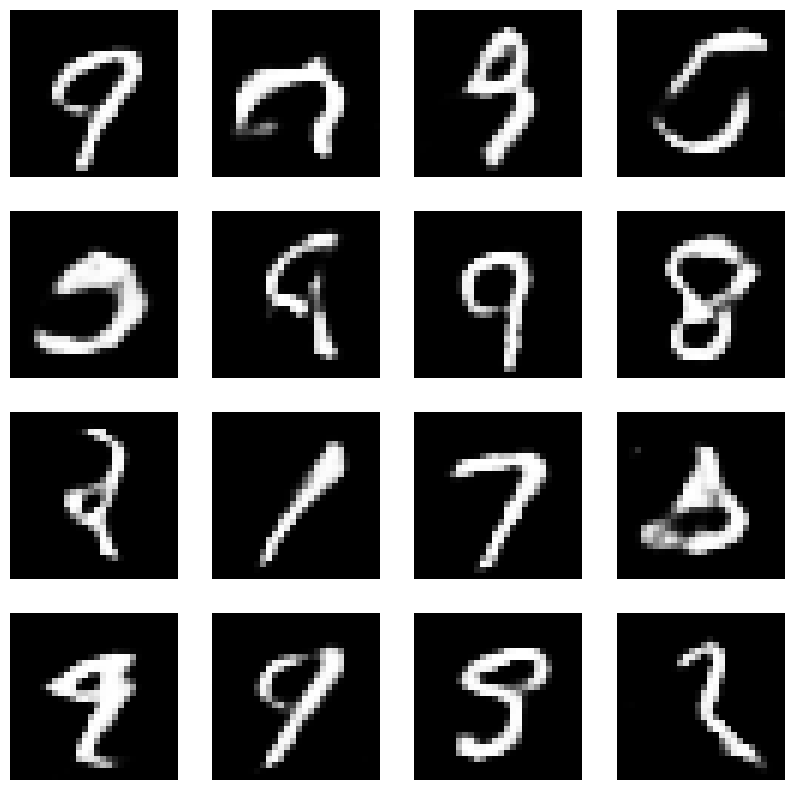

Epoch:  66


2024-05-18 07:30:14.008864: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


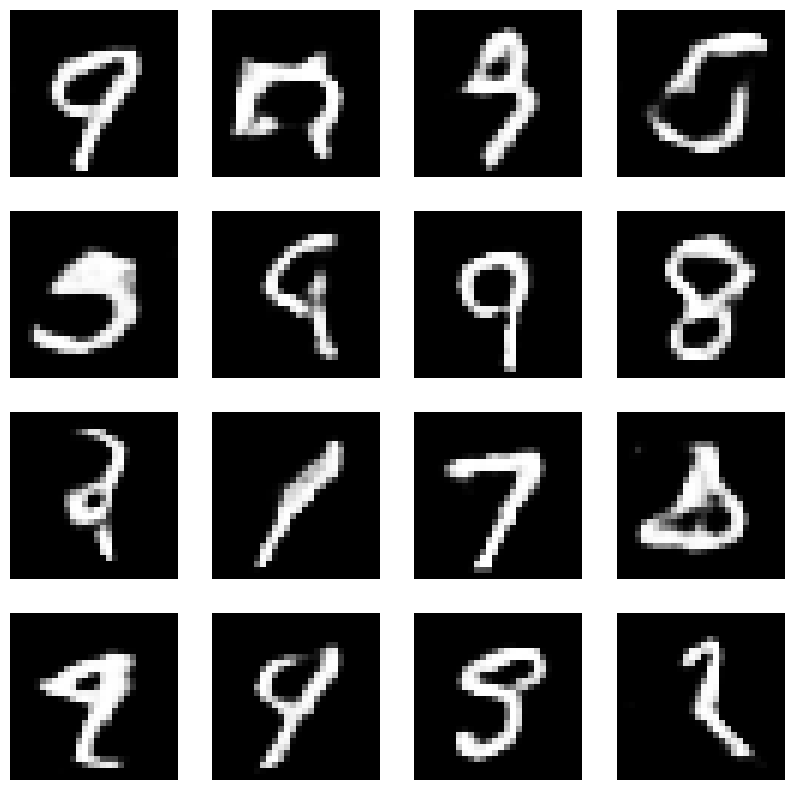

2024-05-18 07:32:31.322044: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch:  67


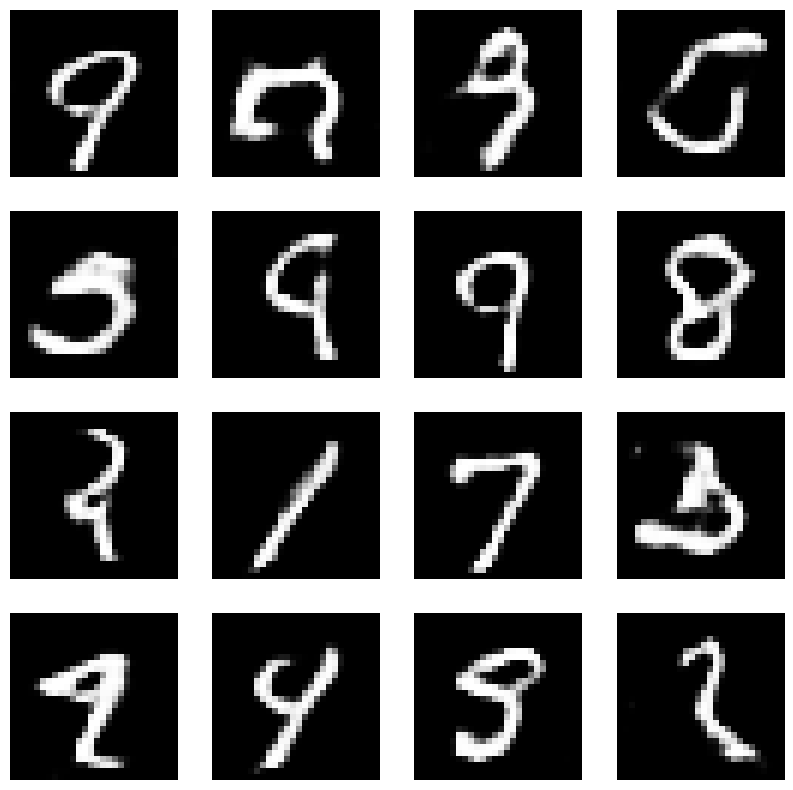

Epoch:  68


2024-05-18 07:34:49.746285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


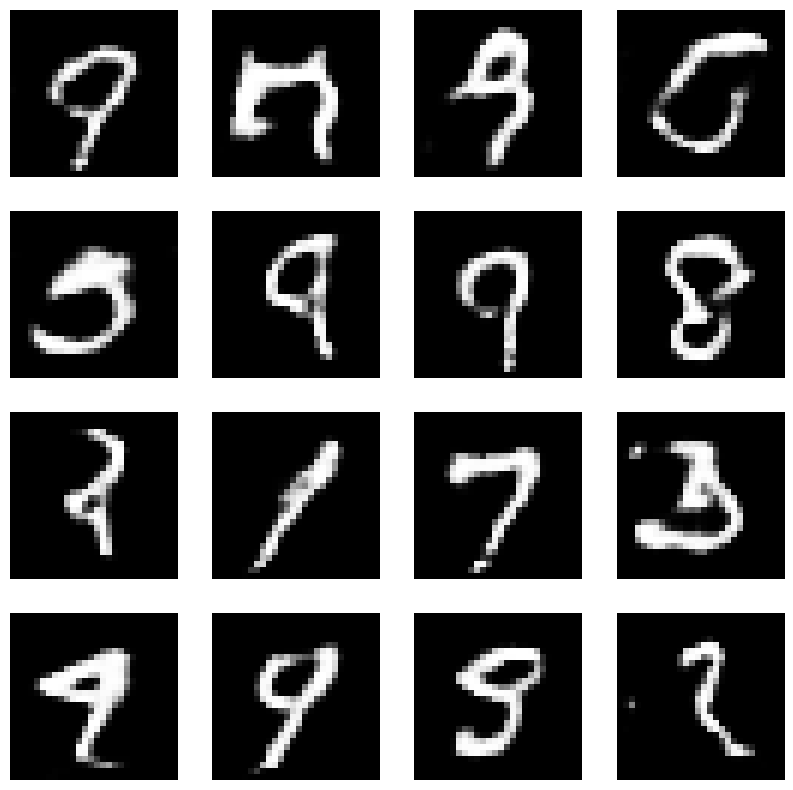

Epoch:  69


2024-05-18 07:37:07.758806: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


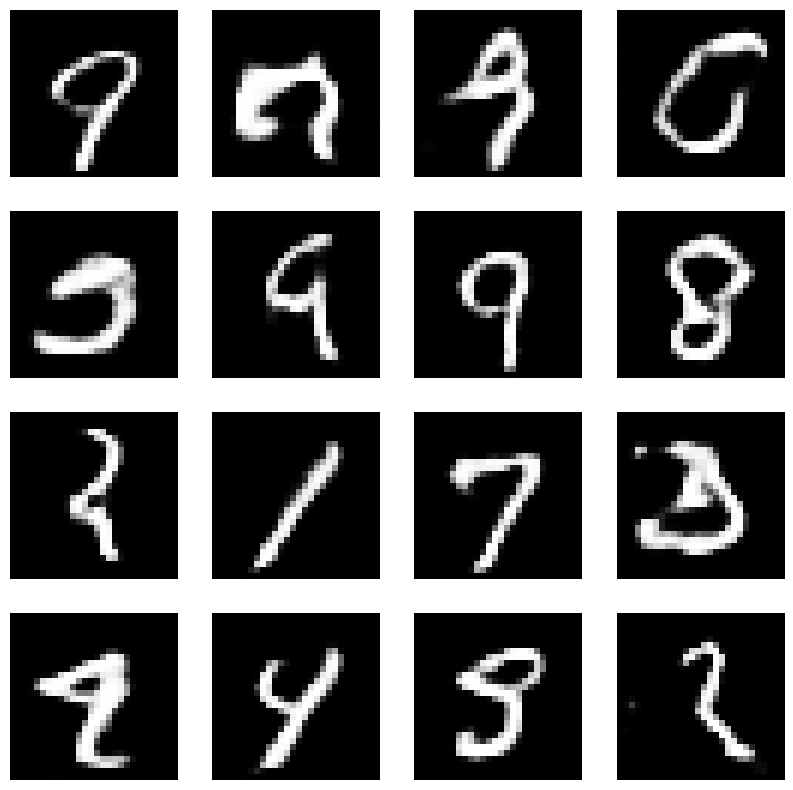

Epoch:  70


2024-05-18 07:39:25.217939: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


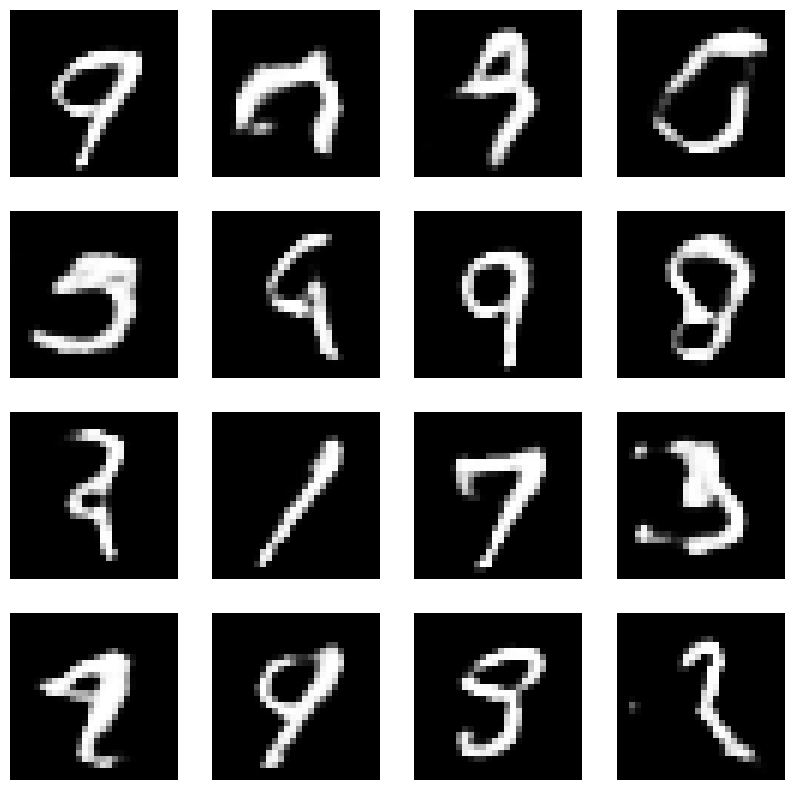

Epoch:  71


2024-05-18 07:41:43.074684: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


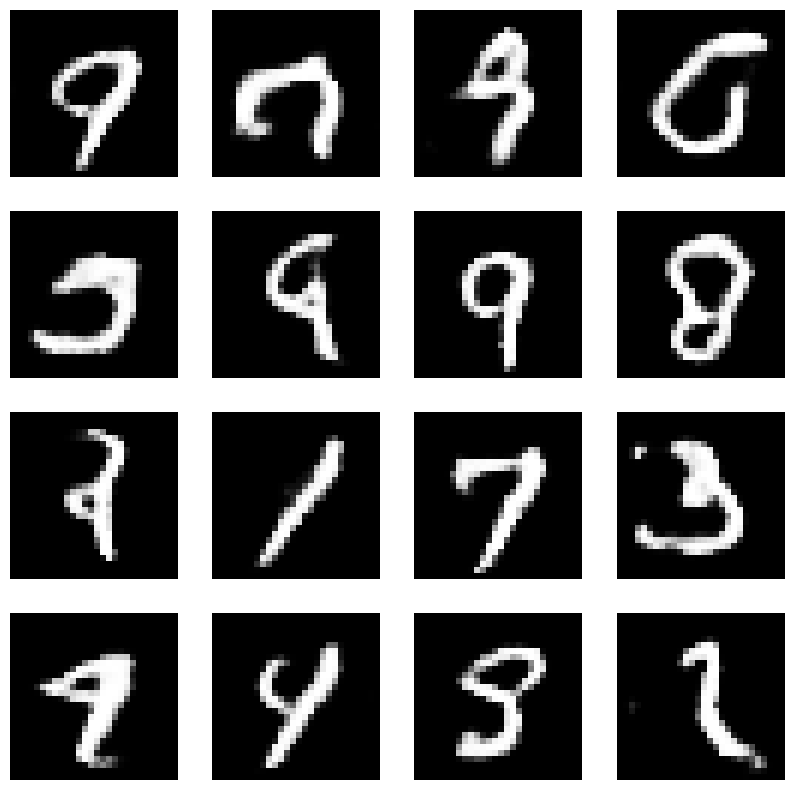

Epoch:  72


2024-05-18 07:44:00.615341: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


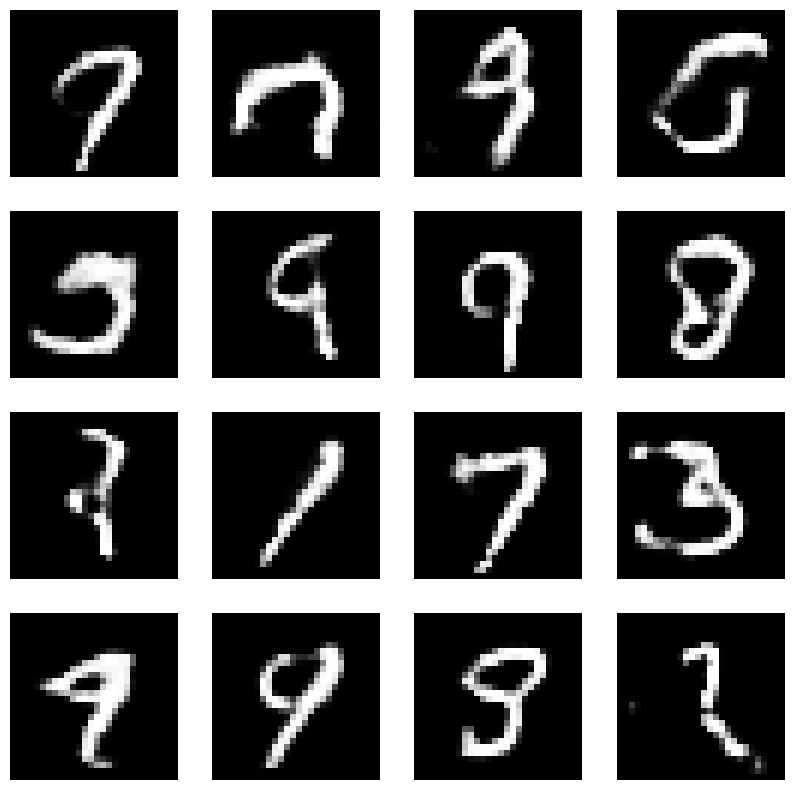

Epoch:  73


2024-05-18 07:46:18.125830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


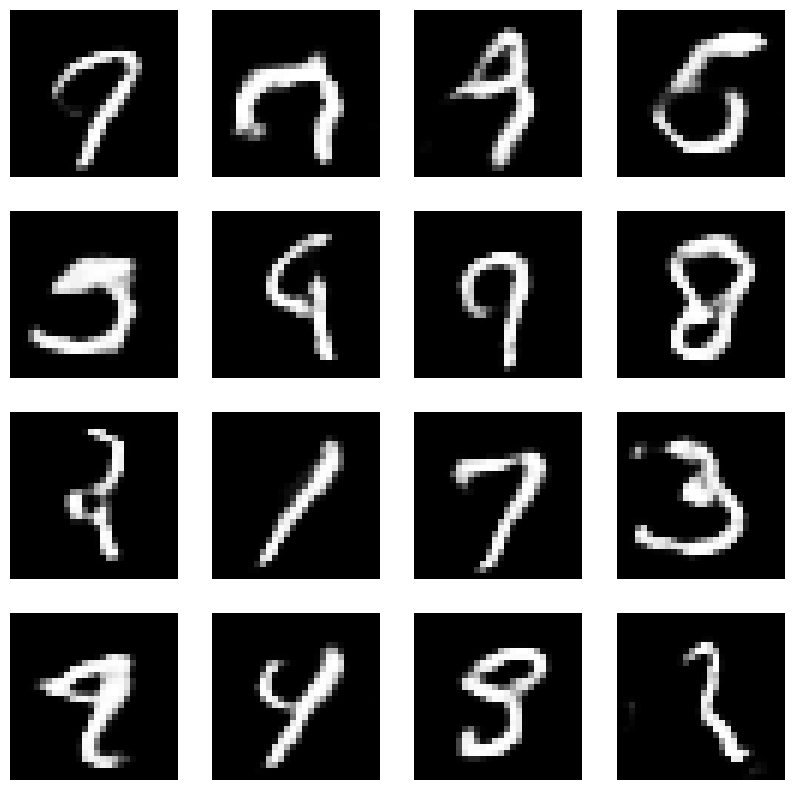

Epoch:  74


2024-05-18 07:48:35.872930: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


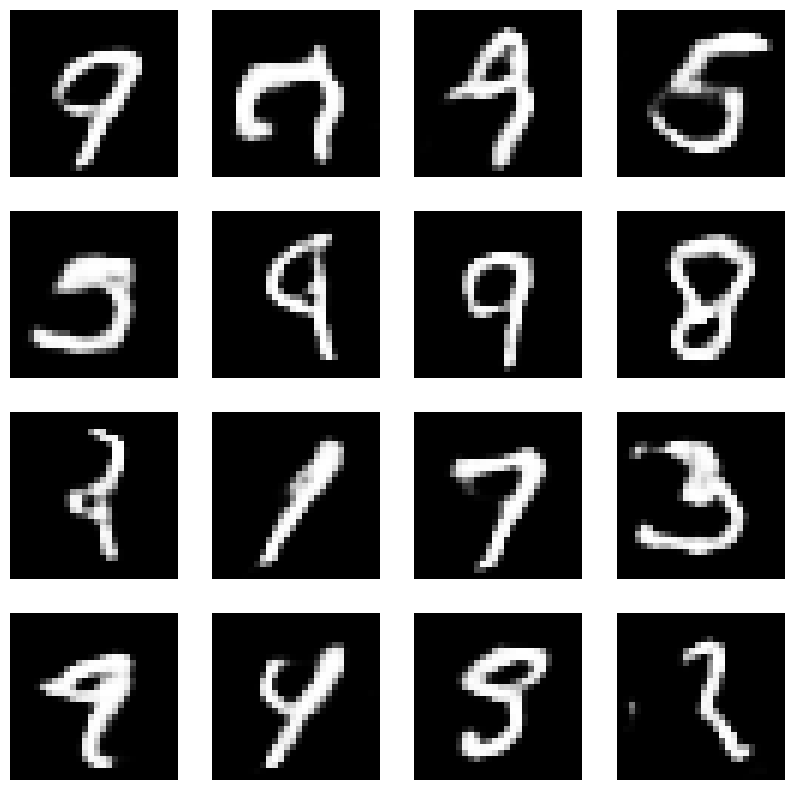

Epoch:  75


2024-05-18 07:50:53.386599: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


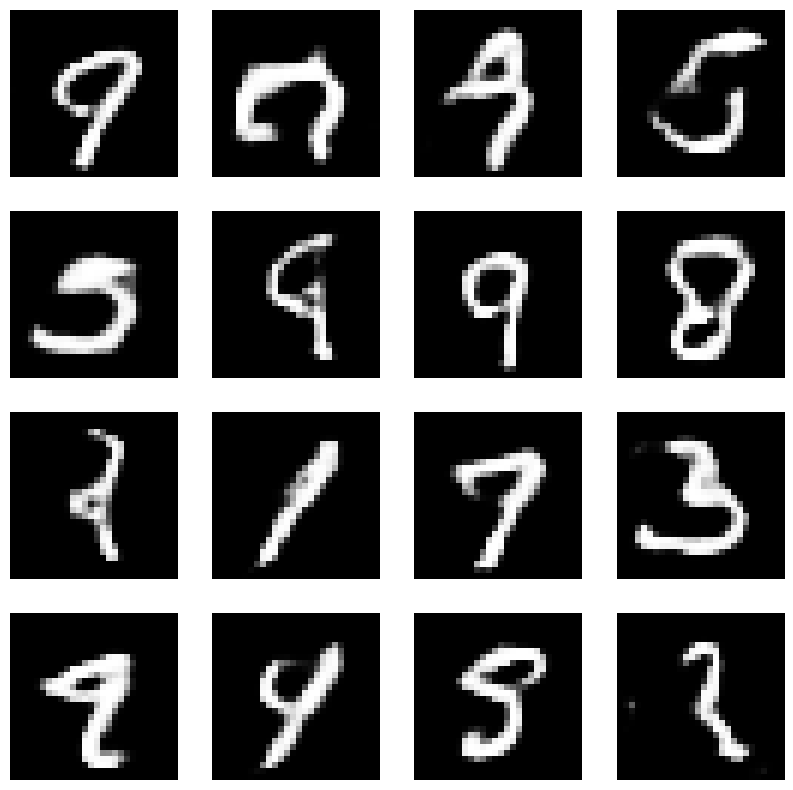

Epoch:  76


2024-05-18 07:53:10.799334: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


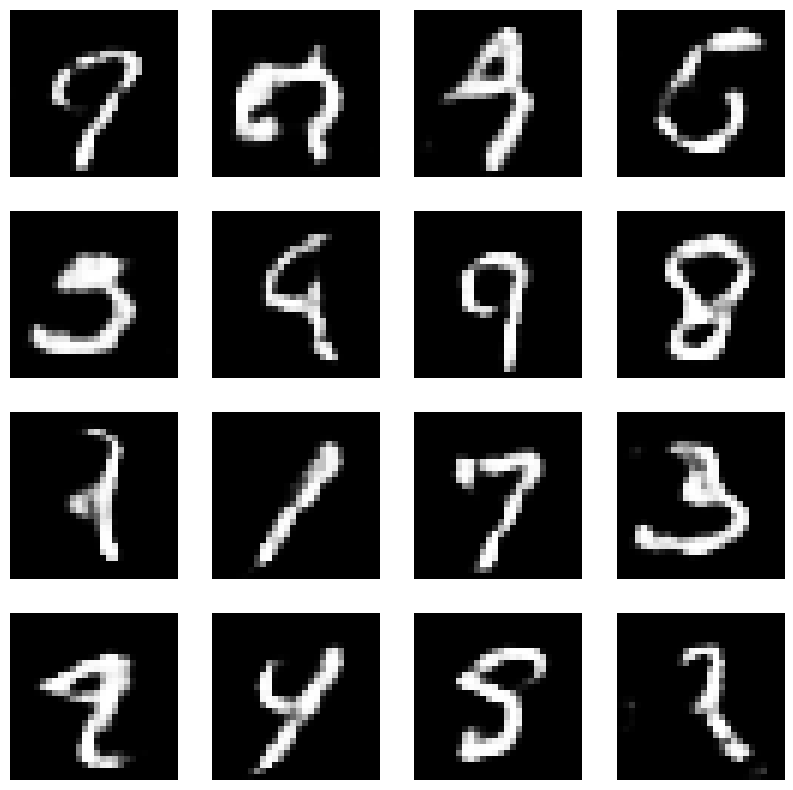

Epoch:  77


2024-05-18 07:55:28.233519: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


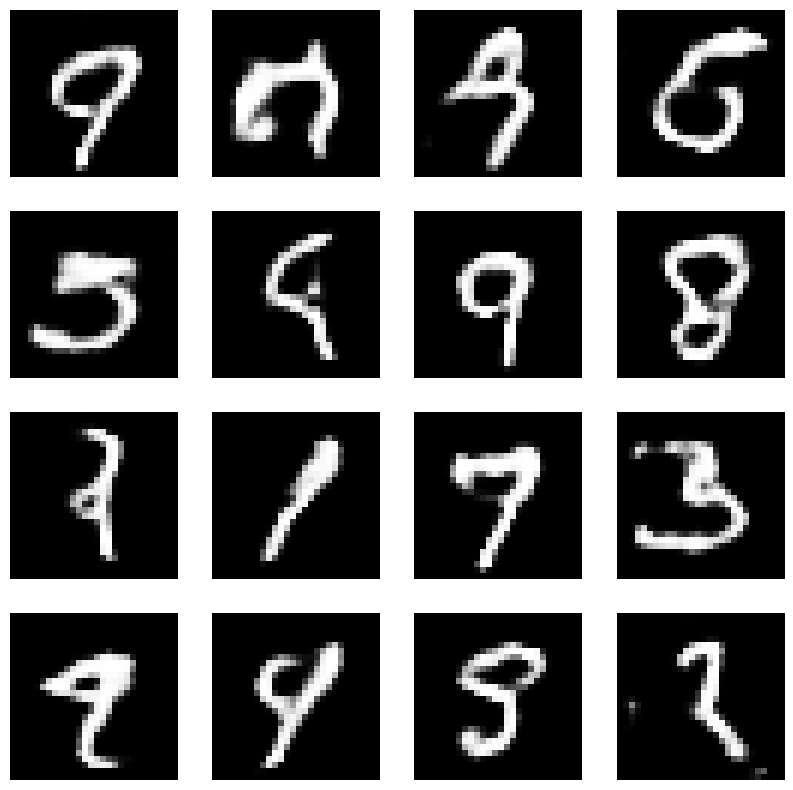

2024-05-18 07:57:45.467030: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch:  78


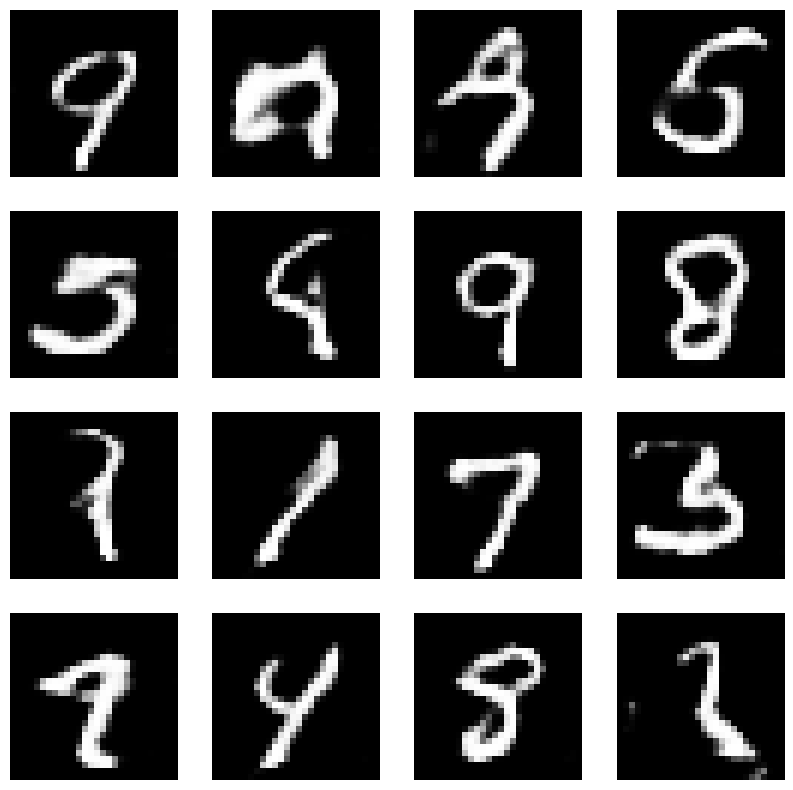

Epoch:  79


2024-05-18 08:00:03.431181: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


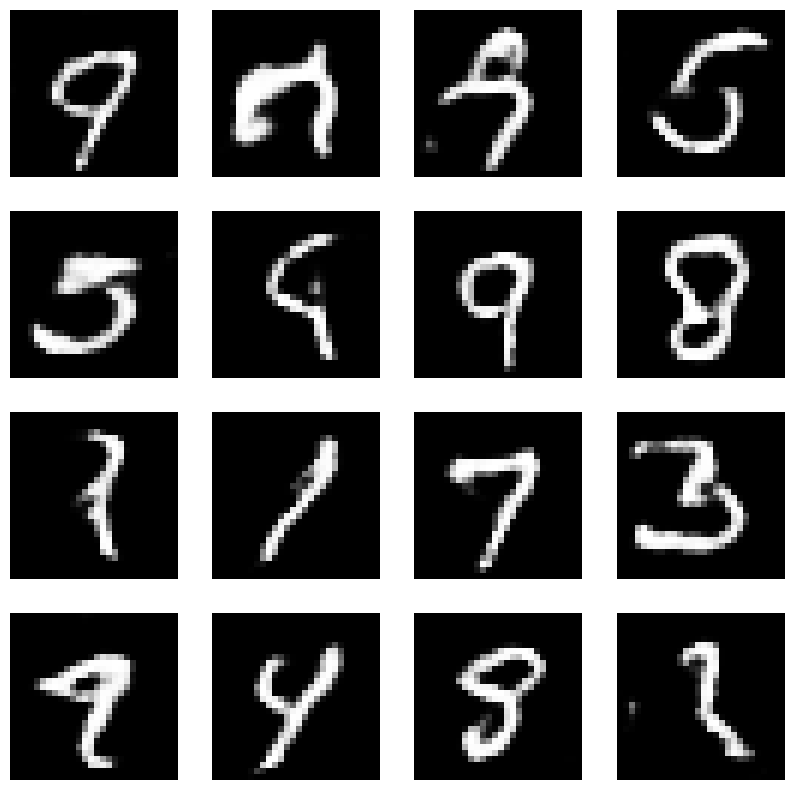

Epoch:  80


2024-05-18 08:02:21.754520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


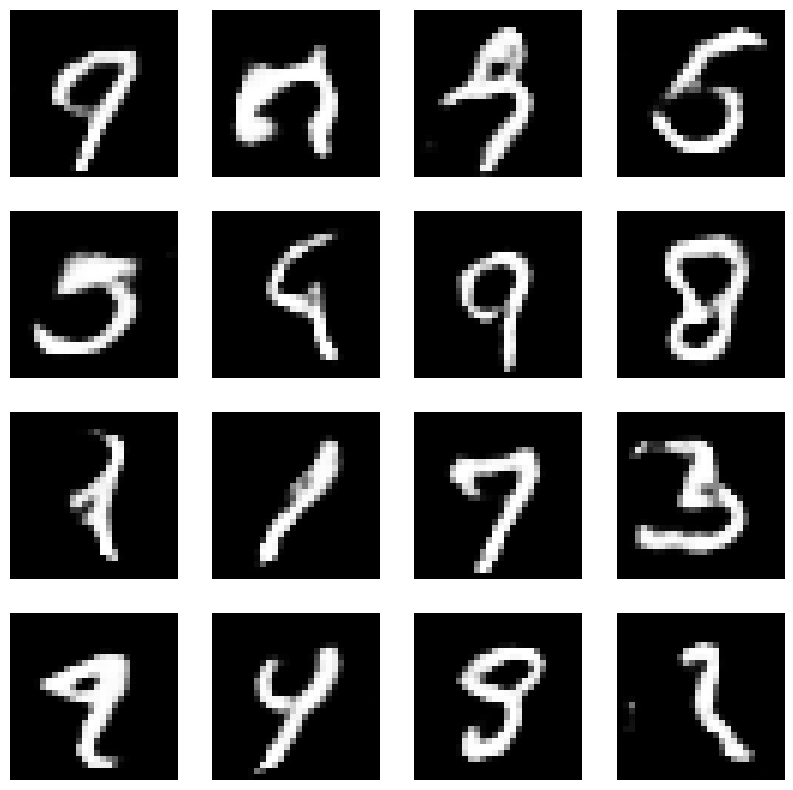

Epoch:  81


2024-05-18 08:04:39.666050: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


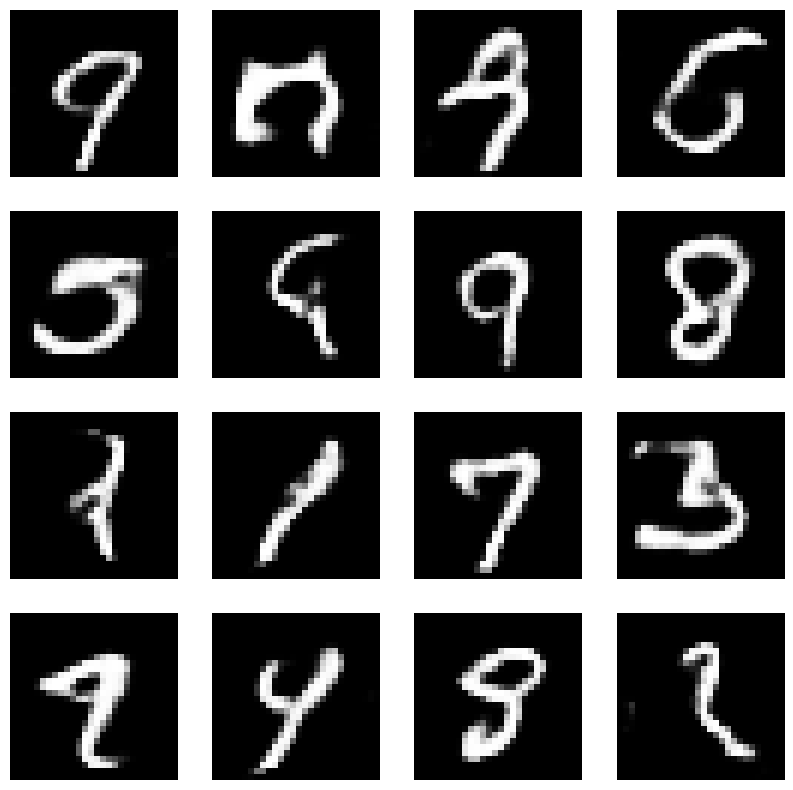

Epoch:  82


2024-05-18 08:06:57.701591: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


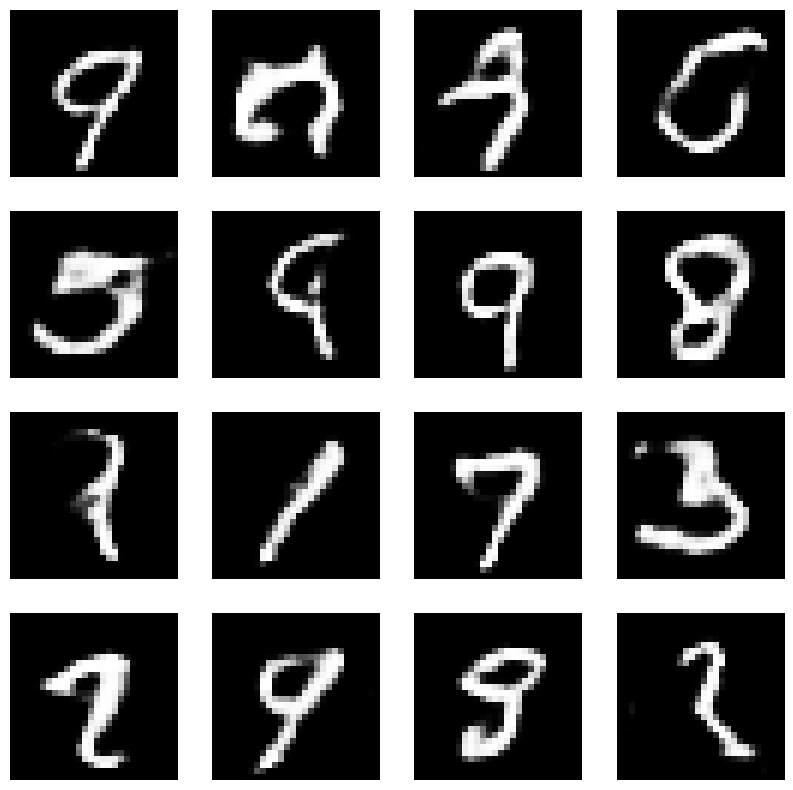

Epoch:  83


2024-05-18 08:09:15.835926: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


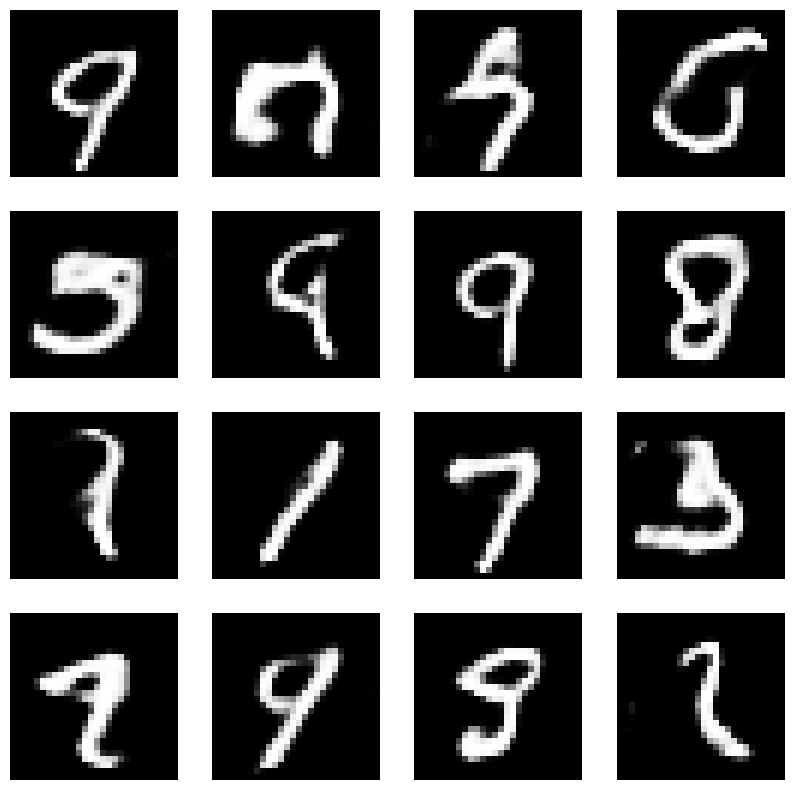

Epoch:  84


2024-05-18 08:11:36.903864: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


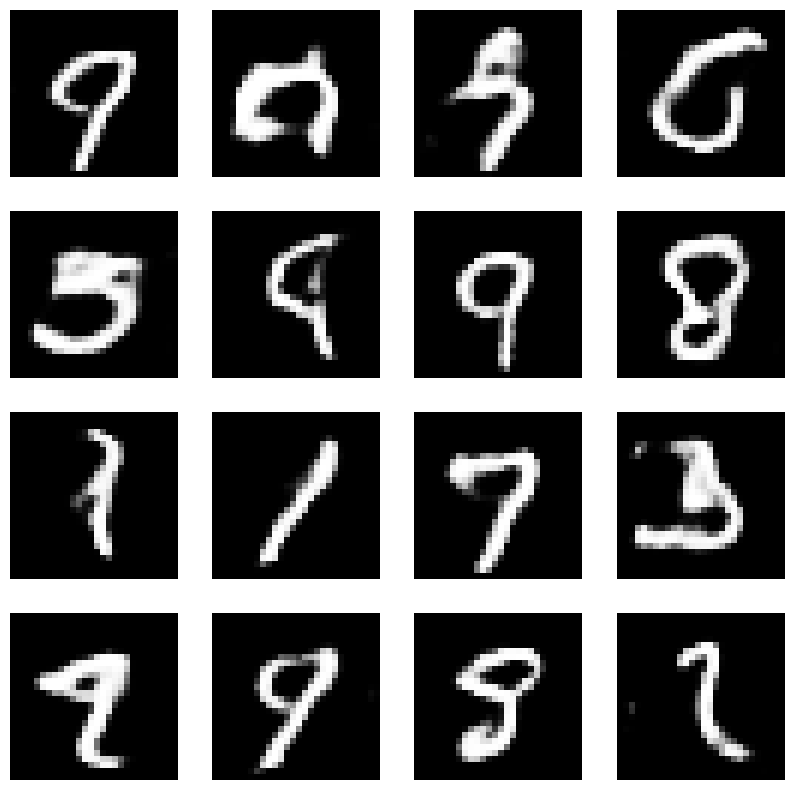

Epoch:  85


2024-05-18 08:14:01.995184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


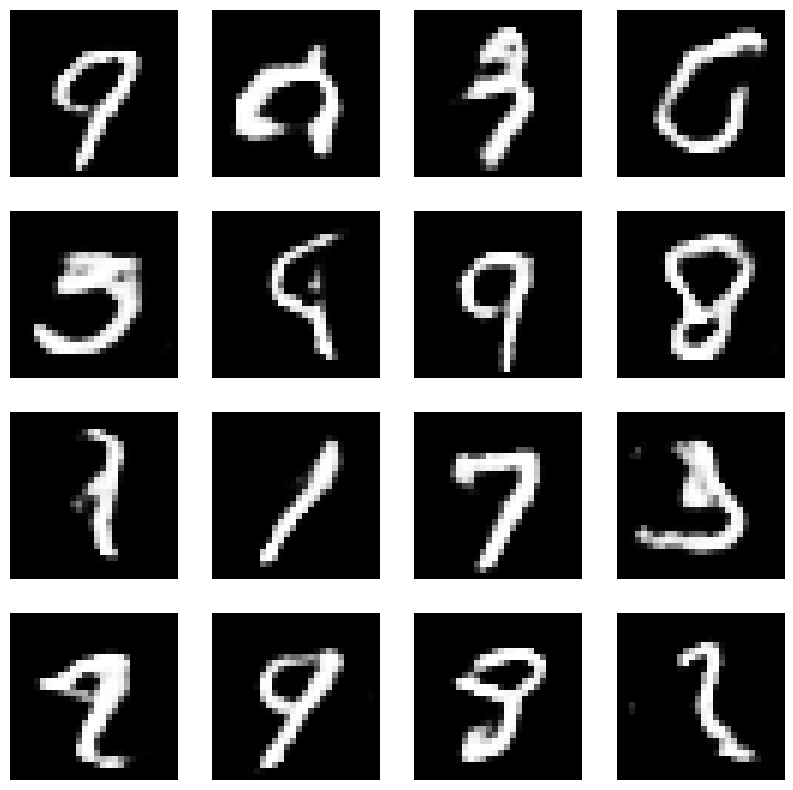

Epoch:  86


2024-05-18 08:16:27.226506: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


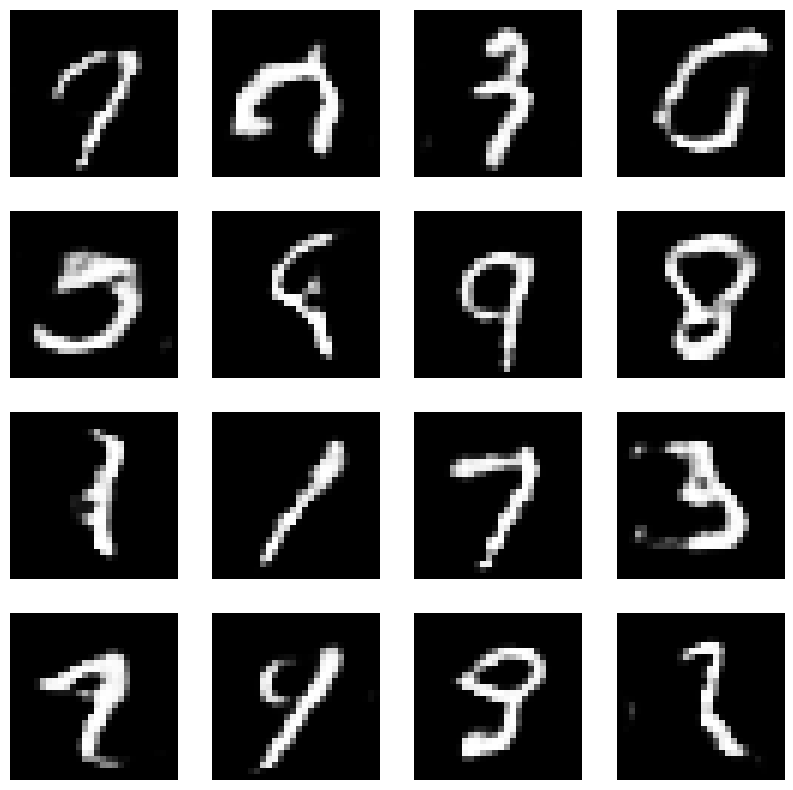

Epoch:  87


2024-05-18 08:18:52.170647: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


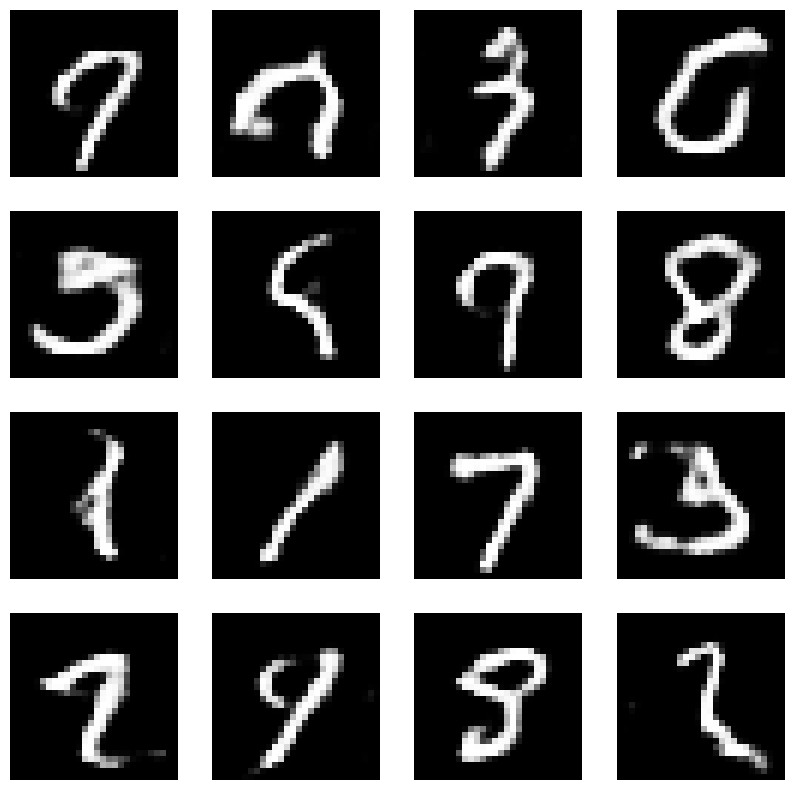

Epoch:  88


2024-05-18 08:21:16.822158: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


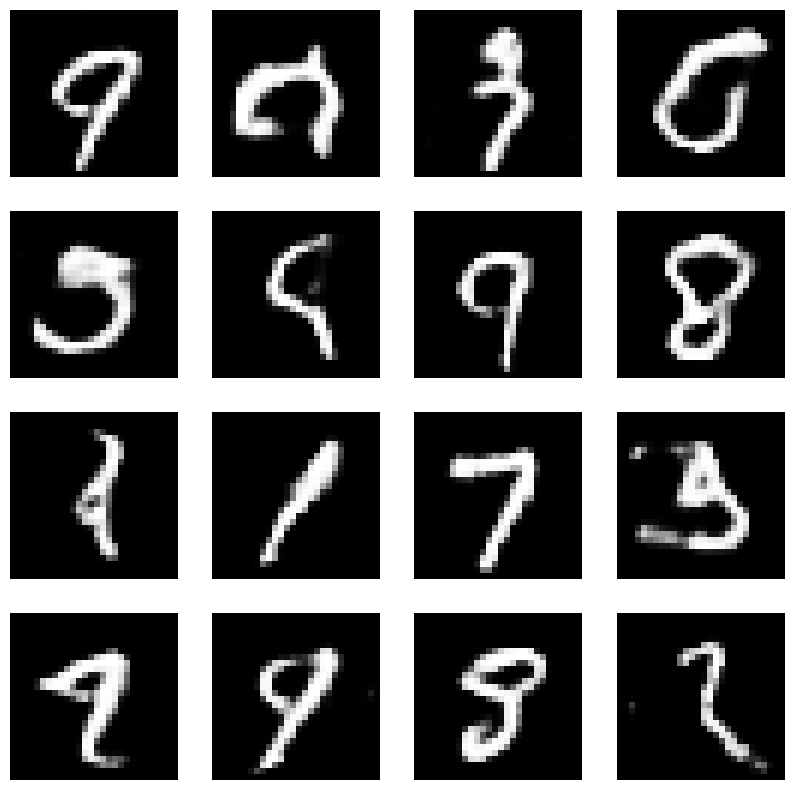

Epoch:  89


2024-05-18 08:23:42.012909: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


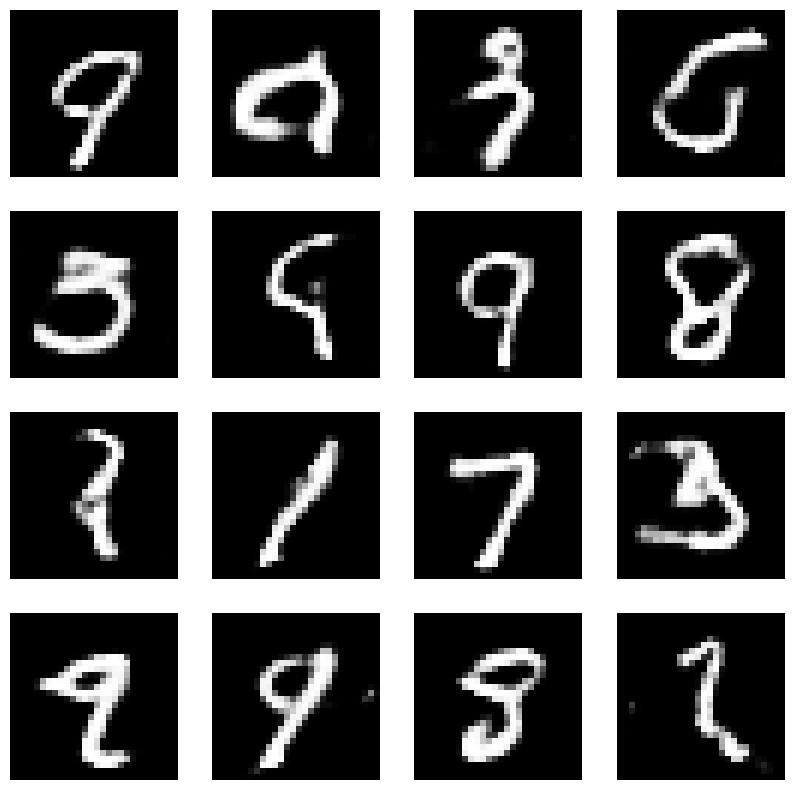

2024-05-18 08:26:07.052642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch:  90


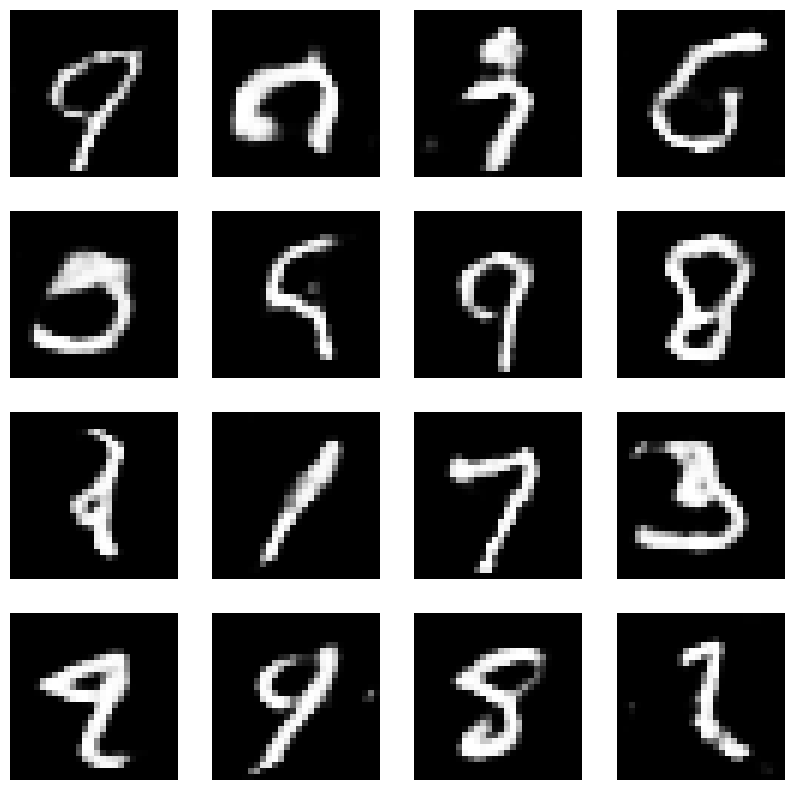

Epoch:  91


2024-05-18 08:48:53.163844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


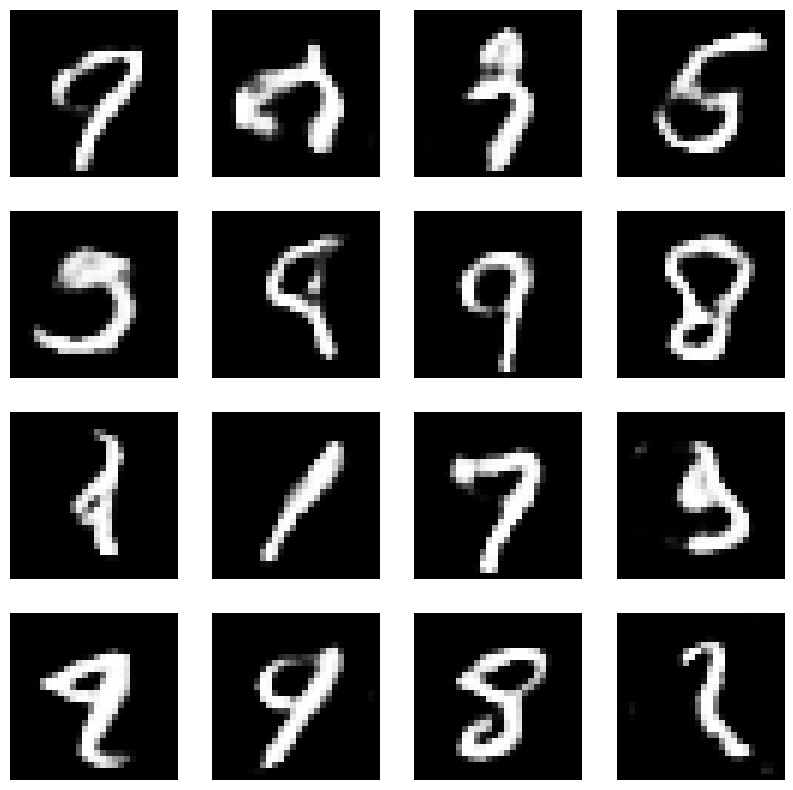

Epoch:  92


2024-05-18 10:09:41.565337: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


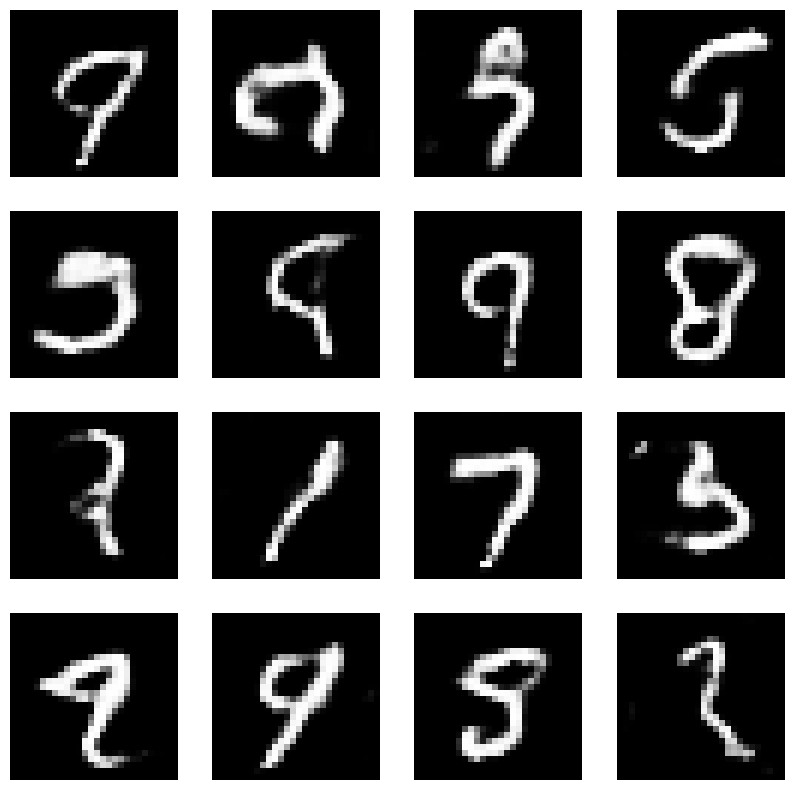

2024-05-18 10:21:07.754347: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch:  93


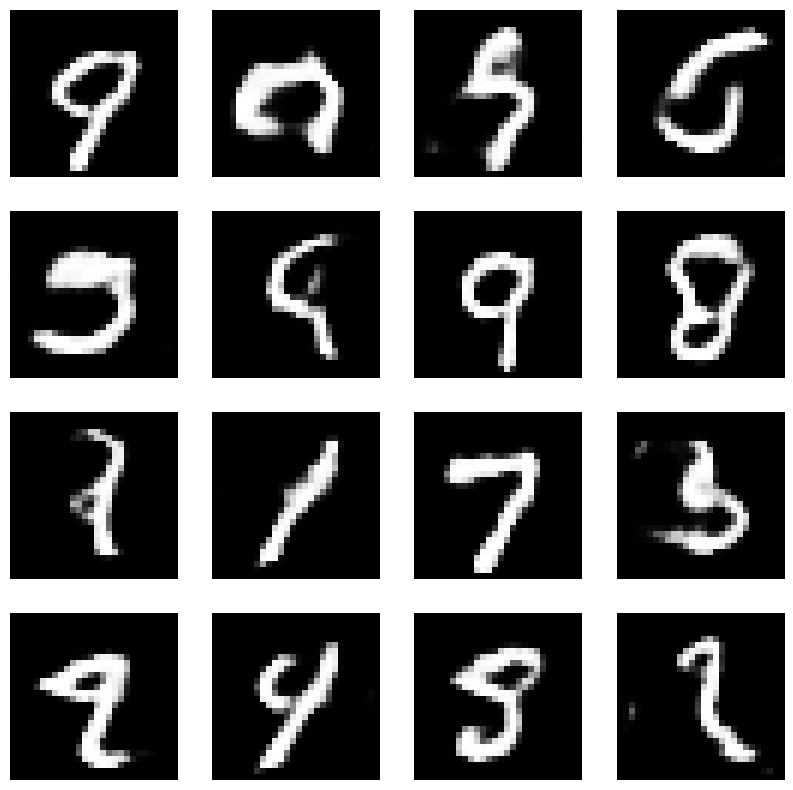

2024-05-18 10:24:39.327361: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch:  94


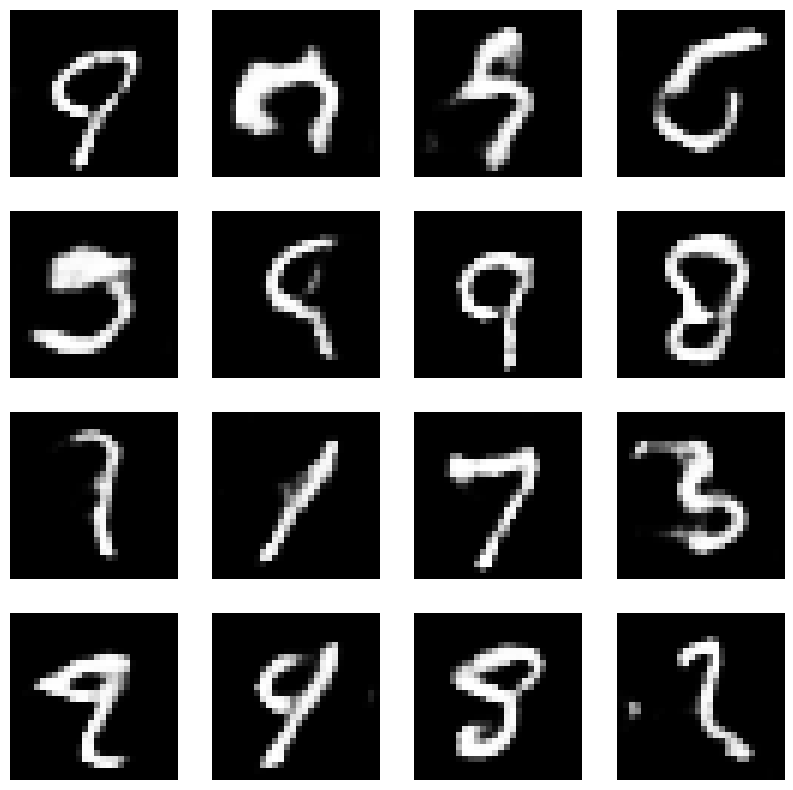

2024-05-18 10:28:33.977215: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch:  95


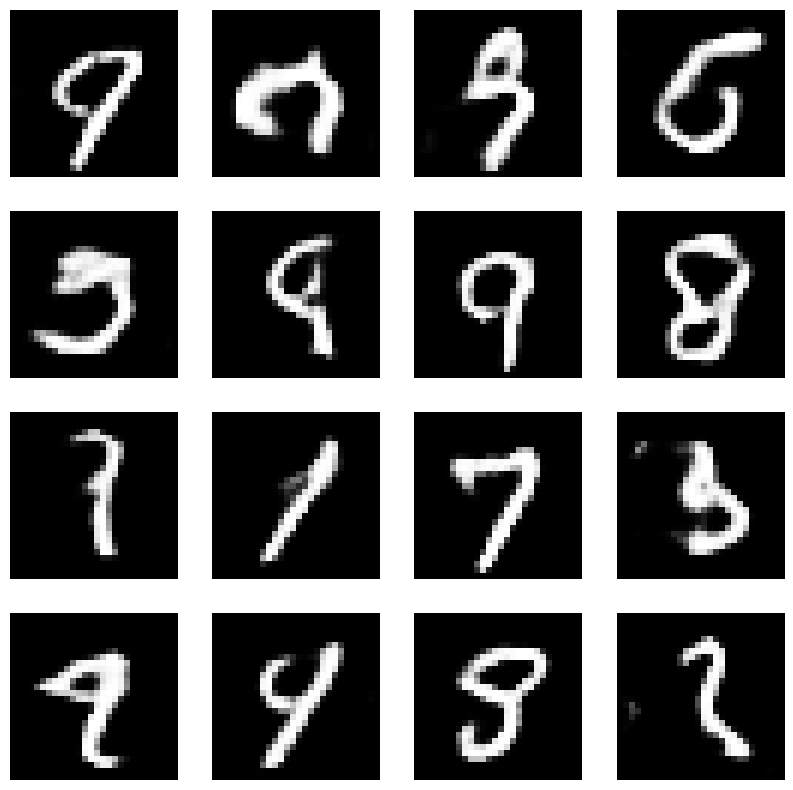

Epoch:  96


2024-05-18 10:31:26.553434: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


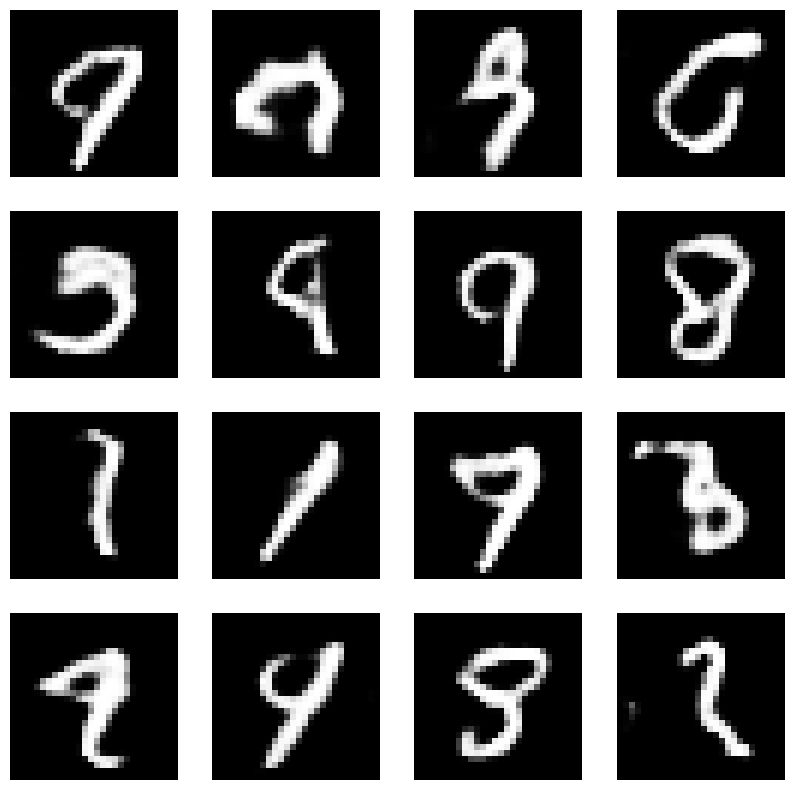

2024-05-18 10:34:54.748125: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch:  97


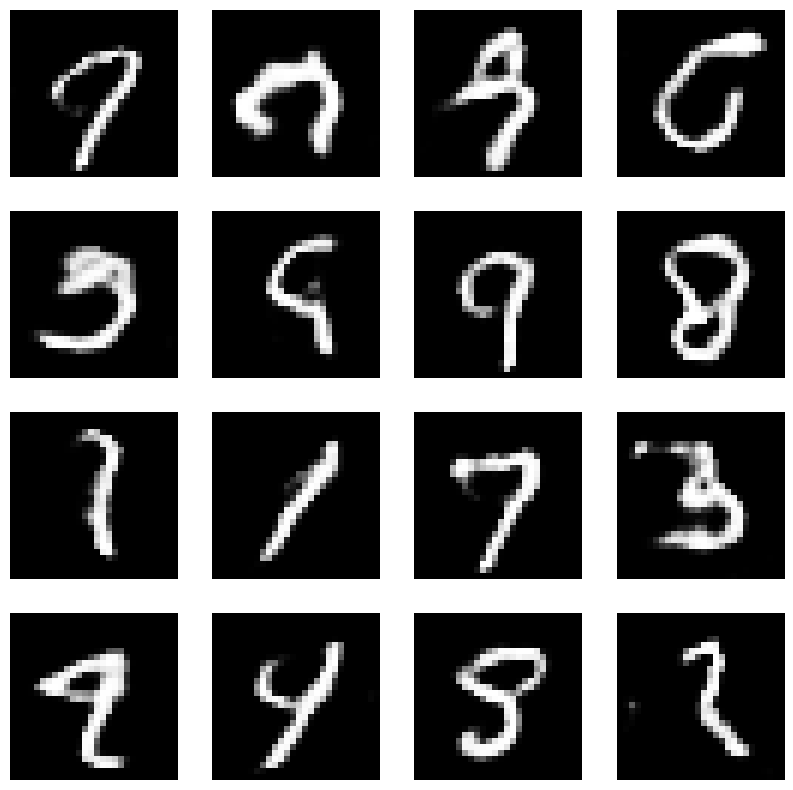

2024-05-18 10:38:47.613793: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch:  98


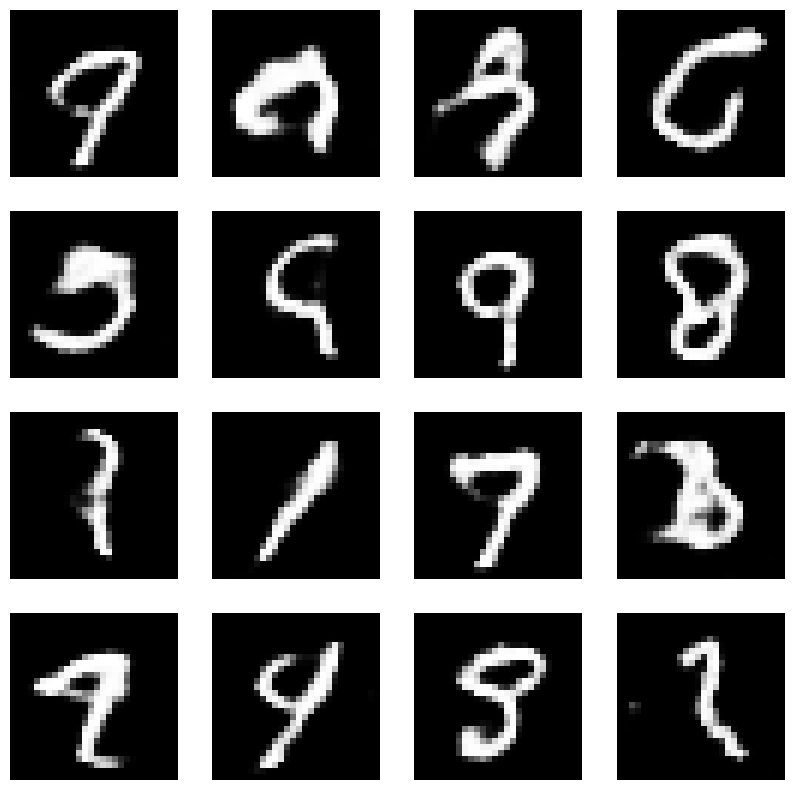

2024-05-18 10:43:37.617924: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch:  99


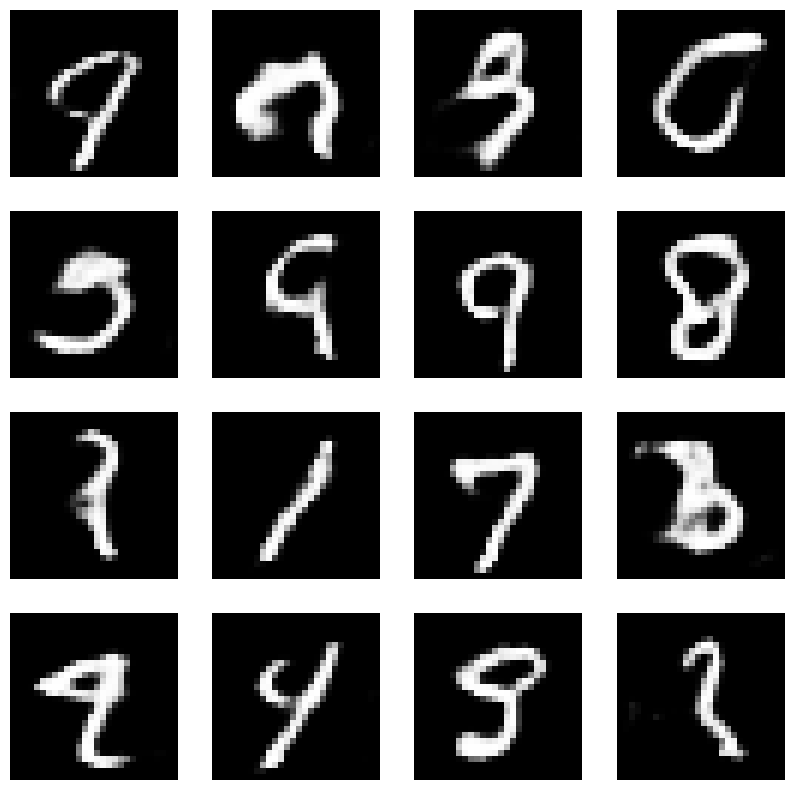

2024-05-18 10:48:31.917287: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch:  100


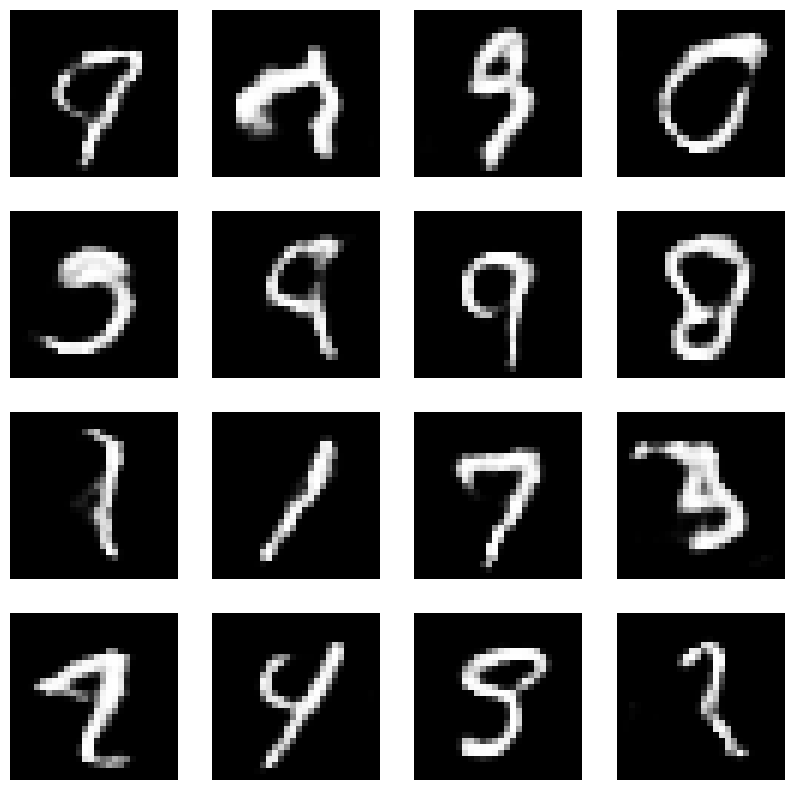

In [251]:
train_gan(X_train, epochs, test_images)